### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Summer 2018 ###

# Optimizing an Optimization Project #

#### Jay Jojo Cheng (jay.cheng@wisc.edu), Dolina Maharjan (maharjan2@wisc.edu), Tatsuya Suzuki (tsuzuki7@wisc.edu), and David Schmidt (dsschmidt2@wisc.edu)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Data Defininitions](#2.-Data-Definitions)
1. [Mathematical Model](#3.-Mathematical-model)
1. [Solution](#4.-Solution)
1. [Results and Discussion](#5.-Results-and-discussion)
1. [Conclusion](#6.-Conclusion)
1. [Appendix](#Appendix)

## 1. Introduction ##
This project will use optimization to explore the processes of creating an optimization project from start to finish. To accomplish this task, we will largely use applications of network flow, mixed-integer programming, and finally extend our model into general convex optimization.

### 1.a Description of the Problem
The Intro-Opti Corporation (IOC) sells a luxury product marketed to students enrolled in ISyE 524 who need to finish their final project. IOC manufactures and sells a finished optimization project that the students may unethically turn in as their own work. In creating this product, IOC must complete a number of project subparts which are further divided into tasks. Recently, to meet student demand, the top brass at IOC are discussing a possible restructuring of the company in order to deliver their product as efficiently as possible. Using different optimization procedures, they hope to explore various  concerns relating to this endeavour. 

### 1.b History, Importance, Assumptions
This project began by attempting to model the proccess by which a company (affiliated with Dolina) was commissioned to create products by its customers. With the goals of maximizing worker utilization and minimizing lead time, we set out to understand aspects of the problem and begin to model. Our original intention was to work with the concrete data provided by the company, however their data collection timeline ended up not lining up well with this project’s end date. We then decided to use the project itself as a source of data.

The different models in this project relate to the [Minimum Cost Network Flow Problem](https://doi.org/10.1287/mnsc.14.3.205). Network flow is an algorithmic paradigm that is able to model an astonishing number of problems, including longest/shortest path problems, matching problems, scheduling, project selection, and even image segmentation! The general idea is to transform the problem into a graph with nodes representing distinct entities, and edges between the nodes representing assignment of work hours, effort, units of a product, etc. Nodes can have supply and demand of the "flow" that they contribute to the overall problem. Edges between the nodes can have minimum and maximum capacities of flow. The goal is to send flow through the nodes in such a way that you satisfy the requirements of the system and thereby find a solution.

This project also resembles assignment problems more generally. This is a classic subfield of optimization problems and comes up naturally elsewhere in applications such as in [auctions](https://doi.org/10.1016/j.ijindorg.2006.10.002), [marriage matching](https://doi.org/10.1287/mnsc.47.9.1252.9784), [scheduling classes to classrooms](https://doi.org/10.1093/comjnl/12.4.307), and [assigning students to school districts](https://www.aeaweb.org/articles?id=10.1257/000282803322157061). 

Thus, the importance of this project is that the approaches and solutions developed here can be easily adapted to these other domains, by altering the relevant parameters.

### 1.c Report Outline

Our approach to this project will be to explore various facets of this problem using several models.

These components are:

*A two parted application transportation prolem with the following goals:*
* Determine how to assign limited resources to tasks to maximize results 
* Explore how specialization affects the outcome

Assumptions:
* All data values are arbitrary. 
* Time investment has a 1:1 relationship with partial credit
* No components are strictly required (that is, any task may be skipped without affecting other tasks, or the overall grade in some way)
* Multiple group members may work on a single task (that is, there's no strict division of labor)


*MILP Model application*

Assumptions:
* Each member has a given skill sets that defines if they could work on a task or not
* Each member could be skilled on the same task but only one task is allowed per task
* Time investment has 1:1 relationship with the partial credit
* Credit or grade for each task is given and its arbitrary
* No components are stricty required (thas is, any task may be skipped without affectign other tasks, or the overall grade in some way


*Two variants of a min cost network flow application with the following goals:*
* Determine the feasibility of all 4 group members being able to complete the project
* Find permutations of possible ways to complete the project given an individual's strengths and time availability, and the possible costs and time requirements of different tasks

Assumptions
* Time is flowing from source to sink
* Nodes are for 4 group members, 21 tasks, and 6 subparts
* Each node is balanced (that is, the amount of time entering into one node equals the amount of time going out from the node)
* Each member has a maximum time to work for
* Each task and subpart has a required time to complete

*A longest path application, specifically project planning:*
* Determine how long a project might take once we account for simultaneous completion of components and interdependent tasks

Assumptions
* Tasks are interdependent
* There are no cyclical dependencies 


*A merging of the two models:*
* Explore how different assignments of group members to tasks can affect the time of completion. 

Assumptions
* All assumptions for longest path and network flow hold (as this is a combination of those)
* The modified time to task completion can be modeled by baseline time / effort

## 2. Data Definitions

In the hopes of removing a bit of abstraction, thus providing some clarity, we provide an explanation of the meaning behind the data. This seems preferable leaving them as numbered nodes. 

The company currently consists of four divisions: DOL, TAT, DAV, and JOJ, each with differential strengths and personnel. The tasks are as follows:

Introduction <br>
1\.	Description of problem<br>
2\.	History of problem<br>
3\.	Problem data<br>
4\.	Outline<br>
<br>
Mathematical model<br> 
5\.	Decision variables, constraints, objective function<br>
6\.	Standard form<br>
7\.	Model type<br>
8\.	Equations<br>
<br>
Solution <br>
9\.	Code model in Julia + JuMP<br>
10\.	Annotated/commented<br>
11\.	Different models/assumptions<br>
<br>
Results and discussion<br> 
12\.	Figures<br>
13\.	Explanation of results<br>
14\.	Interpretation of results<br>
15\.	Limitations of results<br>
16\.	Sensitivity to assumptions<br>
<br>
Conclusion<br> 
17\.	Summary of findings and results<br>
18\.	Future direction<br>
<br>
Aesthetics and quality control<br> 
19\.	Quality control<br>
20\.	Originality<br>
21\.	Creativity<br>

The DOL division is customer-facing, and is responsible collecting client-data. As a result, its strengths are in tasks 1, 2, 3, 4, 5, 11, 13, 17, 18, 19. The TAT division has a history of consulting for clients in power engineering, and its strengths are in tasks 4, 5, 6, 7, 8, 9, 12, 15, 16, 20. The DAV division currently handles software engineering for IOC, and it is most proficient in 3, 5, 6, 7, 9, 10, 11, 15, 18, 21. Employees in the JOJ division prefer to work on tasks 1, 5, 6, 7, 8, 11, 12, 14, 17, 19.

## 3. Mathematical model ##

### Transportation Model
**Problem Setting:** 
In this section, we explore the application of specialization to a transportation problem.

Let the set of tasks J represent the 21 given tasks and the set I of "doers" represent the 4 individuals we defined earlier: dol, tat, joj, dav.

Each task ∈ J has a demanded time commitment, $d_j$, and a value component $v_j$. <br>
Each doer ∈ I has supply $s_i$ and an associated list ($Q_i$) of tasks  they cannot complete due to their specialization. 

$Overall\ grade = \sum{\frac{hours\ spent \ per \ task}{hours\ needed}} * value$

**Decision Variables**

1. $x_{ij}$ is a variable defines the amount of hours spent by doer i on task j


**Constraints**

1. Amount of hours spent by each doer on all tasks should be no more than the "supply" of hours they can spend

    $\displaystyle {\sum_{j∈J}^{}{x_{ij}}}<=s_i$, $\forall i∈ I$

2. Amount of hours spent on each task should be no more than than the total demand of that task

    $\displaystyle {\sum_{i∈I}^{}{x_{ij}}}<=d_j$, $\forall j∈ J$
    
3. Tasks may not be done without an individual being specialized in that task

    $\displaystyle {\sum_{j∈Q_i}^{}{x_{ij}}}<=0$, $\forall i∈ I$
    
4. Hours spent cannot be negative
    
    ${x_{i,j}}>=0$, $\forall i∈ J$
    
**Objectve**

Maximize  $\displaystyle {\sum_{i∈I}^{}\sum_{j∈J}^{}\frac{x_{i,j}}{d_j}} * {v_j}$

The above model is a linear program, specifically a modified transportation problem. Instead of minimizing cost, its
goal is to maximize reward. The model does not need to be balanced, it uses inequalities with its supply/demand constraints. 
Doing so models the idea of partial credit, and the reality that it may be impossible to fully complete a project. 

**Model**

$$\begin{aligned}
  \underset{x}{\text{minimize}}\qquad& {-(\sum_{i∈I}^{}\sum_{j∈J}^{}\frac{x_{i,j}}{d_j}} * {v_j}) \\
    \text{subject to:}\qquad& {\sum_{j∈J}^{}{x_{ij}}}<=s_i, \forall i∈ I\\
     & {\sum_{i∈I}^{}{x_{ij}}}<=d_j, \forall j∈ J \\
     & {\sum_{j∈Q_i}^{}{x_{ij}}}<=0, \forall i∈ I \\
    & {x_{i,j}}>=0, \forall i∈ I \\
    \end{aligned}$$

Links to Code:
1. [Transportation 1](#Transportation-Part-1)
1. [Transportation 2](#Transportation-Part-2)


### MILP model

**Problem Setting:**  This model is very similar to the transportation problem except for the idea that we wanted to restrict tasks such that they cannot be shared between people. Also the task assignment has to be an integer value so we wanted to model the problem using integer variables.

Let *task* be 21 tasks given and *doer* be the 4 individuals we defined earlier *dol, tat, joj, dav*

Let the skill of each individual be *$S_{task, doer}$*. Each task may have multiple people capable of completing it. The entry for task 1 and doer 1 will be 1 if task 1 can be done by the person 1, 0 if it can not be done by person 1. Hence, it will be a matrix of size *$task*doer$* and will have binary entries. 

Let *$W_{task}$* be the amount of work needed in order to complete each task. 

Let *$Reward_{task}$* be the grade assigned for each task.

$grades=\frac{\sum{hours_{spent}}}{\sum{hours_{needed}}}*{\sum{Reward_{task}}}$

**Decision Variables**

1. $Z_{task,doer}$ is a binary variable that defines if the task will be done by doer 
2. $X_{task,doer}$ is a variable defines the amount of hours spent on each task by doer

   
 
**Constraints**

1. Each task should be done by one doer

    $\displaystyle {\sum_{i}{Z_{ji}}}=1, \forall j∈ tasks,i∈ doers$
2. The doer who has the skill to do the task can only do that task

 if $S_{task,doer} =1$ then $Z_{task,doer} <= 1$  else  $Z_{task,doer}=0$ could also be formulated as:

    $\displaystyle {Z_{ji}=S_{ji}*1,} \forall j∈ tasks,i∈ doers$
3.  Amount of hours spent by each doer on all tasks should be less than the upper limit (30 hours)

    $\displaystyle {\sum_{j∈J}^{}{X_{ji}}}<=30$, $\forall j∈ tasks$ ,i∈ doers    
4. Hours spent cannot be negative
    
    ${X_{ji}}>=0$, $\forall j∈ tasks,i∈ doers$     
5. Amount of hours spent on each task should be less than then the workload each person is assigned

    $\displaystyle {\sum_{j∈J}{X_{ji}}}<=W_{j}*{Z_{j,i}}\forall j∈ tasks,i∈ doers$
 
  


**Objectve**

Maximize  $\displaystyle {\sum_{j∈task}^{}\sum_{i∈doer}^{}\frac{X_{i,j}}{W_i}} * {Rewards_i}$

Hence the above model is the **MILP** model as we have both binary and integer variables with the objective function to maximize the sum of the dot product of hours and reward. This model will also solve for the optimal set of tasks to be preformed in order to aximize the grade. Thus we can write our model in the standard form as followed. 



**Model**

$$\begin{aligned}
    \underset{X,Z}{\text{minimize}}\qquad& {-(\sum_{j∈task}^{}\sum_{i∈doer}^{}\frac{X_{ji}}{W_j}} * {Reward_j}) \\
    \text{subject to:}\qquad& {\sum_{i}{Z_{ji}}}<=1, \forall i∈doer\\
    & {-\sum_{i}{Z_{ji}}}<=-1, \forall i∈doer\\
      & {Z_{ji}<=S_{ji}*1,} \forall j∈ tasks,i∈ doers\\
       & {-Z_{ji}<=-S_{ji}*1,} \forall j∈ tasks,i∈ doers\\
      & {\sum_{j}{X_{ji}}}<=30,\forall i∈doer \\
      &{\sum_{j}{X_{ji}}}<=W_{j}*{Z_{ji}},\forall i∈doer\\
      & Z_{ji} \in\ {0,1\\}X_{ji}>=0\\
      \end{aligned}$$

Link to code:
1. [MIP](#MIP-Model)

### Maximum Flow Models

**Problem setting:** <br>
In this model, we wish to maximize worker utilization, modeled as a maximum flow model. We assume that each division has 30 units of worker effort to contribute to the project, that all 21 tasks must receive at least one unit of effort, and that each subpart is devoted a certain minimum units of effort proportional to its grade breakdown.
Translating this into the language of flow graphs, we define the graph $G_{f}=(N_{f},E_{f})$. Here we have listed the 33 nodes of the graph, as well as the shorthand names:

**Parameters and constraints**
* Nodes $N_{f}$
    * Source: $flowsource$
    * Sink: $flowsink$
    * 4 divisions: $dol$, $tat$, $dav$, $joj$
    * 21 tasks: $t1,\ldots,t21$
    * 6 subparts: $intro$, $model$, $soln$, $results$, $concln$, $aesth$

There are 72 directed edges, listed here with their costs and capacity constraints:
* Directed edges $E_{f}$
    * 4 edges from s_flow to each of the divisions (4 edges total)
        * Upper capacity of 30
        * Cost of 0
    * 10 edges from each division to the 10 tasks it can perform (40 total)
        * No capacity constraints
        * Cost of 0
    * 1 edge from each task to the subpart it falls under (21 total)
        * Lower capacity of 1
        * Cost of 0
    * 1 edge from each subpart to t_flow (6 total)
        * Lower capacity of 15, 25, or 5 depending on the point value of the report section
        * Cost of 0
    * 1 virtual edge from t_flow to s_flow (1 total)
        * This is the negative feedback loop
        * No constraint capacities
        * Cost of -1

Only the virtual edge receives a nonzero cost. Thus, when we minimize the total cost, we will send as much flow as possible through the network.


![fixit flowchart][flow]

[flow]:https://i.imgur.com/oEt0O0n.png)
 
**Decision variables**<br>
$x^{flow}_{ij}$ with $i,j\in N_{f}$ represent the amount of flow to send along each of the directed edges in $E_{f}$. We will sometimes alternatively write these as $x^{flow}_{1},\ldots,x^{flow}_{72}$ referring to them in a ordered list, especially when discussing the code implementation.

**Objective** <br>
$\min -x_{tflow}$
The above model is a linear program, specifically a maximum flow model. The balance of flow across all nodes is 0, and the goal of maximizing worker utilization is modeled by the amount of flow passing through each of the four division nodes. The effort assigned to each task is represented by the amount of flow through each of the 21 task nodes, and the total effort spent on a subpart is the amount of flow through each of the 6 subpart nodes.

The lower capacity constraints on the edges out of the task nodes allow us to require that at least one unit of flow (representing a unit of work effort) is devoted to each task. SImilarly, the lower capacity constraints on the edges out of the subparts allow us to require minimum amounts of effort for each subpart. These minimum requirements for subparts are proportional to the point values on the final report. The upper capacity constraints on the edges out of the divisions allow us to limit the number of effort units any one division contributes.

In standard form for a linear program, this is 

$$\begin{aligned}
  \underset{x^{flow} \in \mathbb{R^{72}}}{\text{minimize}}\qquad& -x^{flow}_{72} \\
    \text{subject to:}\qquad& A^{flow}x^{flow}=0 \text{ (balance constraint)} \\
    & x^{flow}_{i} \leq 30 \text{ for }i \in \{1,2,3,4\} \text{ (division upper cap.)} \\
    & -x^{flow}_{i} \leq -1 \text{ for }i \in \{45,\ldots,65\} \text{ (task lower req.)} \\
    & -x^{flow}_{66} \leq -15 \text{ (intro lower req.)} \\
    & -x^{flow}_{67} \leq -25 \text{ (model lower req.)} \\
    & -x^{flow}_{68} \leq -25 \text{ (solution lower req.)} \\
    & -x^{flow}_{69} \leq -25 \text{ (results lower req.)} \\
    & -x^{flow}_{70} \leq -5 \text{ (conclusion lower req.)} \\
    & -x^{flow}_{71} \leq -5 \text{ (aesthetics lower req.)} \\
    & x^{flow}_{i} \geq 0 \ \forall \ i
    \end{aligned}$$

where $A^{flow}$ is the incidence matrix for the possible division and task assignments.

Links to code:
1. [Network Flow Using Arc Variables](#Network-flow-model-using-arc-variables)
1. [Network Flow using Incidence Matrix](#Flow-model)

### Longest Path Model


**Problem setting:** <br>
In this model, we wish to determine the time it takes to complete a project, modeled as a longest path model. This can be modeled as a graph with nodes representing the tasks and subparts and edges modeling the dependencies on one task/subpart on another.

**Parameters and constraints**
There are 29 edges:
* Nodes $N_{f}$
    * Source: $pathsource$
    * Sink: $pathsink$
    * 21 tasks: $t1,\ldots,t21$
    * 6 subparts: $intro$, $model$, $soln$, $results$, $concln$, $aesth$

There are 48 directed edges, representing the dependencies on one task/subpart on another. The introduction, model, solution, result, and conclusion subparts are dependent on the constiuent tasks within each. The aesthetics subpart is dependent on the completion of all other subparts. Here, we list dependencies of tasks:



| Task No | Task Name                               | Subpart             |        Dependendencies  |
|:-------:|:----------------------------------------|---------------------|:-----------------------:|
| 1       | Description of problem                  | Intro               |                         |
| 2       | History of problem                      | Intro               |            1            |
| 3       | Problem data                            | Intro               |            1            |          
| 4       | Outline                                 | Intro               |                         |
| --      |                                         |                     |                         |
| 5       | Decis. var., const., obj. func.         | Model               |            1            |
| 6       | Standard form                           | Model               |            5            |
| 7       | Model type                              | Model               |            5            |
| 8       | Equations                               | Model               |           6,7           |
| --      |                                         |                     |                         |
| 9       | Code model in Julia + JuMP              | Solution            |            8            |
| 10      | Annotated/commented                     | Solution            |            9            |
| 11      | Different models/assumptions            | Solution            |            9            |
| --      |                                         |                     |                         |
| 12      | Figures                                 | Results             |            11           |
| 13      | Explanation of results                  | Results             |            11           |
| 14      | Interpretation of results               | Results             |            13           |
| 15      | Limitations of results                  | Results             |            14           |
| 16      | Sensitivity to assumptions              | Results             |            14           |
| --      |                                         |                     |                         |
| 17      | Summary of findings and results         | Conclusion          |            15           |
| 18      | Future direction                        | Conclusion          |            17           |
| --      |                                         |                     |                         |
| 19      | Quality control                         | Aesthetics          |       all subparts      |
| 20      | Originality                             | Aesthetics          |       all subparts      |
| 21      | Creativity                              | Aesthetics          |       all subparts      |

![fixit flowchart][flow2]

[flow2]:https://i.imgur.com/g3gONt9.png)

The math model for the longest path portion of the problem is:

**Decision variables**<br>
$x^{path}_{1},\ldots,x^{path}_{48}$ represent whether or not a particular edge is located on the longest (maximum weight) path.

**Objective** <br>
$\max \sum_{i=1}^{48}C^{path}_{i}x^{path}_{i}$

Maximizing this quantity allows us to find the edges located on the longest path.

Thus, we can write our math model in standard form as follows:

$$\begin{aligned}
  \underset{x^{path} \in \mathbb{R^{48}}}{\text{maximize}}\qquad& \sum_{i=1}^{48}C^{path}_{i}x^{path}_{i} \\
    \text{subject to:}\qquad& A^{path}x^{path}=b^{path}=[1,0,\ldots,0,-1]^{T} \text{ (path constraint)} \\
    & x^{path}_{i} \geq 0 \ \forall \ i
    \end{aligned}$$

where $A^{path}$ is the incidence matrix for the dependency graph. As seen here, the the objective and constraints are linear, so this is a linear program.

Link to code:
1. [Longest Path Model](#Longest-path-model)

### Joint Optimization Model

In order to maximize worker utilization and minimize the lead time of the project, we wish to implement the max flow model and path models jointly (we refer to this model as the joint model).

In our joint model, we want to again find the time it takes to complete the project, but here we model the time it takes to complete a particular task to be dependent on the amount of effort devoted to that task. In terms of the two graphs, if an edge from task $i$ to task $j$ $(i,j)$ on the longest path model has a corresponding baseline weight of $C_{ij}$, and $x^{flow}_{j+44}$ is the flow from task $j$ to its parent subpart, then we model the modified weight to be $\hat{C}_{ij}=(C_{ij}/x^{flow}_{j+44})$. In other words, for an edge into a task node on the longest path graph, we the modified weight is the baseline edge weight divided by the flow into the corresponding task node on the max flow graph. Thus the sum becomes $\sum_{i,j\in N_{p}}\hat{C}_{ij}=\sum_{i,j\in N_{p}}(C_{ij}/x^{flow}_{j+44})$, where $N_{p}$ is the set of nodes in the path model.

Then, our joint model takes the form

**Decision variables:** <br>
$x^{path}_{1},\ldots,x^{path}_{48},x^{flow}_{1},\ldots,x^{flow}_{72}$

$$\begin{aligned}
  \underset{x^{flow}_{45},\ldots,x^{flow}_{65}}{\text{minimize}}\qquad& \underset{x^{path} \in \mathbb{R^{48}}}{\text{maximize}} \sum_{i,j \in N_{p}}(C_{ij}/x^{flow}_{j+44})x^{path}_{ij} \\
    \text{subject to:}\qquad& A^{flow}x^{flow}=b^{flow}=0 \text{ (balance constraint)} \\
    & A^{path}x^{path}=b^{path}=[1,0,\ldots,0,-1]^{T} \text{ (path constraint)} \\
    & x^{flow}_{i} \leq 30 \text{ for }i \in \{1,2,3,4\} \text{ (division upper cap.)} \\
    & x^{flow}_{i} \geq 1 \text{ for }i \in \{45,\ldots,65\} \text{ (task lower req.)} \\
    & x^{flow}_{66} \geq 15 \text{ (intro lower req.)} \\
    & x^{flow}_{67} \geq 25 \text{ (model lower req.)} \\
    & x^{flow}_{68} \geq 25 \text{ (solution lower req.)} \\
    & x^{flow}_{69} \geq 25 \text{ (results lower req.)} \\
    & x^{flow}_{70} \geq 5 \text{ (conclusion lower req.)} \\
    & x^{flow}_{71} \geq 5 \text{ (aesthetics lower req.)} \\
    & x^{flow}_{i} \geq 0 \ \forall \ i \\
    & x^{path}_{i} \geq 0 \ \forall \ i
    \end{aligned}$$
    
The interpretation of this problem is that we are trying to choose a max flow (as seen over the task to subpart edges $x^{flow}_{45},\ldots,x^{flow}_{65}$) such that the maximum path on the resultant longest path model is minimal. We note that under this formulation, it is possible that we do not obtain a max flow (i.e. one is not necessary to minimize the longest path). However, we note that augmenting the flow into a max flow will not make the maximum path longer, and we can still find a solution that maximizes worker utilization.

In a minimax problem with linear functions, we can use the epigraph trick to reformulate the problem as a linear program. Here, such a trick does not work because the particular  Another reason is that the interior maximization is itself a linear program, and in general, solutions to linear programs do not have closed forms.

Our approach to solving this problem is to take the approach detailed in Ghosh and Boyd's [notes on bilinear minimax games](https://web.stanford.edu/class/ee392o/cvxccv.pdf): we will first convert the interior maximization into its dual problem to get an equivalent minimization problem.

First, for a given max flow (in particular $x^{flow}_{45},\ldots,x^{flow}_{65}$), the interior maximization is

$$\begin{aligned}
  \underset{x^{path} \in \mathbb{R^{48}}}{\text{maximize}}\qquad& \hat{C}^{T}x^{path}=\sum_{i,j \in N_{p}}(C_{ij}/x^{flow}_{j+44})x^{path}_{ij} \\
    \text{subject to:}\qquad& A^{path}x^{path}=b^{path}=[1,0,\ldots,0,-1]^{T} \text{ (path constraint)} \\
    & x^{path}_{i} \geq 0 \ \forall \ i
    \end{aligned}$$
    
We note that this is an LP without any inequalities, so Slater's condition holds and we have strong duality.

The dual of this LP is

$$\begin{aligned}
  \underset{\nu \in \mathbb{R^{29}}}{\text{minimize}}\qquad& (b^{path})^{T}\nu \\
    \text{subject to:}\qquad& (A^{path})^{T}\nu-\hat{C}\geq 0 \\
    & \nu \text{ free}
  \end{aligned}$$
  
where $\nu$ is a vector of length 29.

Then we can use the dual to rewrite the joint problem as

$$\begin{aligned}
  \underset{x^{flow}_{45},\ldots,x^{flow}_{65},\nu}{\text{minimize}}\qquad& (b^{path})^{T}\nu \\
    \text{subject to:}\qquad& A^{flow}x^{flow}=b^{flow}=0 \\
    & (A^{path})^{T}\nu - \sum_{i,j\in N_{p}}(C_{ij}/x^{flow}_{j+44})\geq 0 \\
    & x^{flow}_{i} \leq 30 \text{ for }i \in \{1,2,3,4\} \\
    & x^{flow}_{i} \geq 1 \text{ for }i \in \{45,\ldots,65\} \\
    & x^{flow}_{66} \geq 15 \\
    & x^{flow}_{67} \geq 25 \\
    & x^{flow}_{68} \geq 25 \\
    & x^{flow}_{69} \geq 25 \\
    & x^{flow}_{70} \geq 5 \\
    & x^{flow}_{71} \geq 5 \\
    & x^{flow}_{i} \geq 0 \ \forall \ i \\
    & \nu \text{ free}
    \end{aligned}$$
    
This problem looks similar to another linear program, except for the nonlinearity in the second constraint. This suggests we should look at a broader class of optimization programs. Geometric programming is also appealing here, since the only nonlinearity are terms of the form $(x^{flow})^{-1}$. However, formulating the problem as a geometric program is not possible because of equalities involving both the variables that we wish perform the log-sum-exp trick on and variables that take on the value of zero (which we cannot perform the log-sum-exp trick on). As is well known, a convex nonlinear function cannot be involved in an equality constraint (since the negative of the function is concave). For more information about this dead-end approach, see the Appendix.

Fortunately, another option exists. The function $f(x)=1/x$ is convex on $\mathbb{R+}$. Furthermore, because of the minimal capacity constraints, $x^{flow}_{45},\ldots,x^{flow}_{65}$ are all positive. Since all other functions in the constraint and objective are affine, we can rewrite the problem in convex standard form:

$$\begin{align}
  \underset{x^{flow}_{45},\ldots,x^{flow}_{65},\nu}{\text{minimize}}\qquad& (b^{path})^{T}\nu = \nu[1] - \nu[29] \\
    \text{subject to:}\qquad& A^{flow}x^{flow}=0 \\
    & \sum_{i,j\in N_{p}}(C_{ij}/x^{flow}_{j+44}) - (A^{path})^{T}\nu \leq 0 \\
    & x^{flow}_{i} - 30 \leq 0 \text{ for }i \in \{1,2,3,4\} \\
    & 1 - x^{flow}_{i} \leq 0 \text{ for }i \in \{45,\ldots,65\} \\
    & 15 - x^{flow}_{66} \leq 0 \\
    & 25 - x^{flow}_{67} \leq 0 \\
    & 25 - x^{flow}_{68} \leq 0 \\
    & 25 - x^{flow}_{69} \leq 0 \\
    & 5 - x^{flow}_{70} \leq 0 \\
    & 5 - x^{flow}_{71} \leq 0 \\
    & x^{flow}_{i} \geq 0 \ \forall \ i \\
    & \nu \text{ free}
    \end{align}$$
    
We will refer to the convex problem above as the **joint optimization program**.

Links to Code:
1. [Joint Model](#Joint-Model)

## 4. Solution ##

### Transportation Part 1 ###

### Part 1 Data

This first section includes a list of doers and tasks and the arbitrary data values for supply, demand, and value. That is, hours each person can commit overall, the hours each task demands, and the relative value of each piece. The actual data values currently have no particular meaning, except that the list of values roughly sums to 100 and I ensured that supply was less than demand. More on the choice of values follows in the discussion section. 

In [52]:
using JuMP, Clp, NamedArrays

doers = [:dol, :tat, :dav, :joj]

tasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t17, :t18, :t19, :t20, :t21]


# Hours each doer has available to work on the project
supply = Dict(zip(doers,[5 5 5 5]))
# Hours it takes to complete a given task
demand = Dict(zip(tasks,[1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 5]))
# Grade reward for completing a given task
value = Dict(zip(tasks,[3 8 4 2 8 2 8 2 8 2 8 2 8 2 8 5 4 4 4 4 4]))

;

In this section, we have a transportation model, except instead of the classic minimization of distance * cost, we have a maximization of grade achieved. Grade achieved is defined by the hours put in divided by the hours demanded (The assumption being that putting in half the time required on a section results in 50% of the reward) times the reward for that particular task. The constraints are <= instead of equalities, as would be normal for a transportation problem, because there is no requirement for balance. In fact, it's a more realistic model, because in real life, tasks are not binary (completed or not). It is very possible for a task to be partially completed. There also should not be any particular restriction that ensures any singular task must be completed (Though this could be explored as an extension to this project). There's also no reason to enforce an equality on supply, as maximizing the overall grade ensures that each person works their maximum hours, if possible.

### Part 1 Model

In [53]:
            
m = Model(solver=ClpSolver())

                        
@variable(m, x[doers, tasks] >= 0) # x[i,j] is the number of hours doer i puts into task j  
            
@constraint(m, sup[i in doers], sum(x[i,j] for j in tasks) <= supply[i] )   # supply constraint
@constraint(m, dem[j in tasks], sum(x[i,j] for i in doers) <= demand[j] )   # demand constraint

# maximize grade (Time spent per task / time demanded by task * reward of task = resultant grade, summed to total grade)  
@objective(m, Max, sum( x[i,j]/demand[j] * value[j] for i in doers, j in tasks) )            

status = solve(m)

println(status)

solution = NamedArray( Int[getvalue(x[i,j]) for i in doers, j in tasks], (doers,tasks), ("doers","tasks") )
println( solution )
println()
println("Total grade will be ", getobjectivevalue(m))

Optimal
4×21 Named Array{Int64,2}
doers ╲ tasks │  :t1   :t2   :t3   :t4   :t5  …  :t17  :t18  :t19  :t20  :t21
──────────────┼──────────────────────────────────────────────────────────────
:dol          │    0     0     2     0     1  …     0     0     0     2     0
:tat          │    1     2     0     0     2        0     0     0     0     0
:dav          │    0     0     0     0     2        0     0     0     0     0
:joj          │    0     0     0     0     0  …     0     0     1     0     0

Total grade will be 47.666666666666664


### Transportation Part 2

### Part 2 Data

There is a significant difference between this model of the transportation code and the previous. In this version, each individual is limited by specialization in certain tasks. That is, a person should only be able to complete certain tasks rather than sharing an identical skillset with the rest of the team, and by extension, sharing the entire task pool. Thus this data section includes lists of valid and invalid tasks for each individual. Do note: the list of valid tasks is unused. It's only present here in the data section for clarity purposes. 

In [54]:
using JuMP, Clp, NamedArrays

doers = [:dol, :tat, :dav, :joj]

tasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t17, :t18, :t19, :t20, :t21]


# Tasks that each person can perform (NOTE: These arrays don't do anything in the code. It just makes it clear what's happening)
dol_tasks = [:t1, :t2, :t3, :t4, :t5, :t11, :t13, :t17, :t18, :t19]
tat_tasks = [:t4, :t5, :t6, :t7, :t8, :t9, :t12, :t15, :t16, :t20]
dav_tasks = [:t3, :t5, :t6, :t7, :t9, :t10, :t11, :t15, :t18, :t21]
joj_tasks = [:t1, :t5, :t6, :t7, :t8, :t11, :t12, :t14, :t17, :t19]

#Tasks that each person cannot perform (inv = invalid)
dol_inv = [:t6, :t7, :t8, :t9, :t10, :t12, :t14, :t15, :t16, :t20, :t21]
tat_inv = [:t1, :t2, :t3, :t10, :t11, :t13, :t14, :t17, :t18, :t19, :t21]
dav_inv = [:t1, :t2, :t4, :t8, :t12, :t13, :t14, :t16, :t17, :t19, :t20]
joj_inv = [:t2, :t3, :t4, :t9, :t10, :t13, :t15, :t16, :t18, :t20, :t21]

# Hours each doer has available to work on the project
supply = Dict(zip(doers,[5 5 5 5]))
# Hours it takes to complete a given task
demand = Dict(zip(tasks,[1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 5]))
# Grade reward for completing a given task
value = Dict(zip(tasks,[3 8 4 2 8 2 8 2 8 2 8 2 8 2 8 5 4 4 4 4 4]))
;  

### Part 2 Code

Enforcing constraints that demand each person works on particular tasks is actually relatively difficult to code and is fairly unclear. The superior method of translating this task restriction into code is to enforce the contrapositive: ensure that no tasks which are invalid for a given person are completed by that person. This is done with lists of invalid tasks, and ensuring the sum of flow on each invalid task for each individual is 0. This results in extremely consise, modifiable code.  

In [55]:
m = Model(solver=ClpSolver())

@variable(m, x[doers, tasks] >= 0) # x[i,j] is the number of hours doer i puts into task j

@constraint(m, sup[i in doers], sum(x[i,j] for j in tasks) <= supply[i] )   # overall supply constraint
@constraint(m, dem[j in tasks], sum(x[i,j] for i in doers) <= demand[j] )   # overall demand constraint

# Constraints to ensure tasks are only completed by those who can complete them (eg: make the graph 
# linking people to tasks not fully connected)
@constraint(m, sum(x[:dol,j] for j in dol_inv) <= 0 )
@constraint(m, sum(x[:tat,j] for j in tat_inv) <= 0 )
@constraint(m, sum(x[:dav,j] for j in dav_inv) <= 0 )
@constraint(m, sum(x[:joj,j] for j in joj_inv) <= 0 )

# maximize grade (Time spent per task / time demanded by task * reward of task = resultant grade, summed to total grade)            
@objective(m, Max, sum( x[i,j]/demand[j] * value[j] for i in doers, j in tasks) )              

status = solve(m)

println(status)

solution = NamedArray( Int[getvalue(x[i,j]) for i in doers, j in tasks], (doers,tasks), ("doers","tasks") )
println( solution )
println()
println("Total grade will be ", getobjectivevalue(m))


Optimal
4×21 Named Array{Int64,2}
doers ╲ tasks │  :t1   :t2   :t3   :t4   :t5  …  :t17  :t18  :t19  :t20  :t21
──────────────┼──────────────────────────────────────────────────────────────
:dol          │    0     2     0     0     0  …     0     0     0     0     0
:tat          │    0     0     0     0     3        0     0     0     2     0
:dav          │    0     0     3     0     1        0     0     0     0     0
:joj          │    1     0     0     0     1  …     0     0     1     0     0

Total grade will be 47.00000000000001


### MIP Model

The following Julia code solves for the optimal value of the grade that could be obtained with the optimal assignments of tasks. The S matrix is the skill matrix that defines the skill of the doer per task. We used srand function to generate hours needed per task. Seed is the input for the function so we can call the function with different work hours and obtain the optimal grade. 

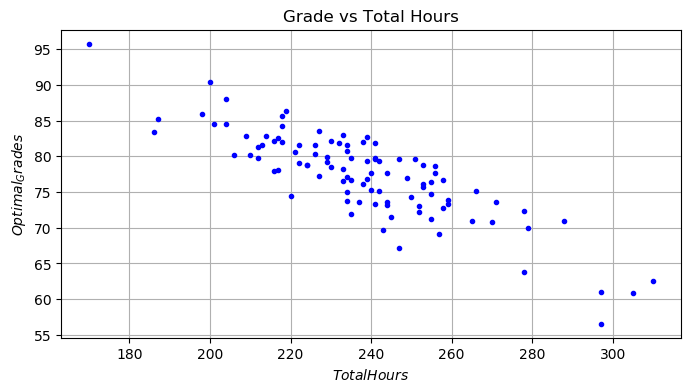

In [1]:
using JuMP, Cbc

doer=4 #given 4 doers
task=21 #given 4 tasks

m = Model(solver = CbcSolver())

Xdol=[1; 1; 1; 1; 1; 0; 0; 0; 0; 0; 1; 0; 1; 0; 0; 0; 1; 1; 1; 0; 0] # dol's task skill
Xtat=[0; 0; 0; 1; 1; 1; 1; 1; 1; 0; 0; 1; 0; 0; 1; 1; 0; 0; 0; 1; 0] #tat's task skill
Xdav=[0; 0; 1; 0; 1; 1; 1; 0; 1; 1; 1; 0; 0; 0; 1; 0; 0; 1; 0; 0; 1] # dav's task skill
Xjoj=[1; 0; 0; 0; 1; 1; 1; 1; 0; 0; 1; 1; 0; 1; 0; 0; 1; 0; 1; 0; 0] # joj's task skill
reward=[4; 8; 4; 2; 8; 2; 8; 2; 8; 2; 8; 2; 8; 2; 8; 5; 4; 4; 4; 4; 4] #reward for each task

S=hcat(Xdol, Xtat, Xdav, Xjoj)  #Skill matrix

function Solvegrade(seed)
    
    srand(seed)
    N=task
    W=round.(rand(N)*20) + 1   #random hours assigned for each task, adding +1 to avoid any 0#
    
    total_hrs_needed=0
    for i in 1:21
        total_hrs_needed=total_hrs_needed+W[i]
    end

    @variable(m, X[1:21,1:4] >= 0)  # hours spent on each task
    @variable(m, Z[1:21,1:4],Bin)  #variable for task assigned to doer

    # the doer who can do task will only do the task
    for i in 1:21
            for j in 1:4
                if S[i,j]==0 
                @constraint(m, Z[i,j]==0)
            end
        end
    end
    
    #sum of doer for each task =1 
    for i in 1:21
        @constraint(m, sum(Z[i,j] for j in 1:4) == 1)
    end

    #sum of hours is less than the upper bound

    for i in 1:21
        for j in 1:4
        @constraint(m, (X[i,j] - Z[i,j]*W[i]) <= 0)
        end
    end

    #sum of hours spent by each doer is less than 30 hours
    for j in 1:4
        @constraint(m, sum(X[i,j] for i in 1:21) <= 30)
    end


    #each task is assigned to one doer
    for i in 1:21
        @constraint(m, sum(Z[i,j] for j in 1:4) == 1)
    end
    
       
    @objective(m, Max,sum(X[i,j]*reward[i]/W[i] for i in 1:21, j in 1:4))
    status=solve(m, suppress_warnings=true)
    gradesopt=getobjectivevalue(m)
  
return(gradesopt,total_hrs_needed)   #fucntion returns optimal grade and the total hours neeeded
        
end;

# plotting the different optimal values with 100 sets of work hours assigned to each task
xaxis = zeros(100)
yaxis = zeros(100)

for n = 1:100
    (yaxis[n],xaxis[n]) = Solvegrade(n)
 
end

using PyPlot
figure(figsize=(8,4))
plot( xaxis, yaxis, "b." )
xlabel(L" Total Hours")
ylabel(L" Optimal_Grades");
title("Grade vs Total Hours")
grid()
;

The warning is not relevant, the plot output works as expected. 

Plotting the different optimal values with different set of work loads for each task. Since, the rewards vary with each task, the optimal value changes as the workload for each task changes. The model suggesting us to work on those task with the highest reward/grades.

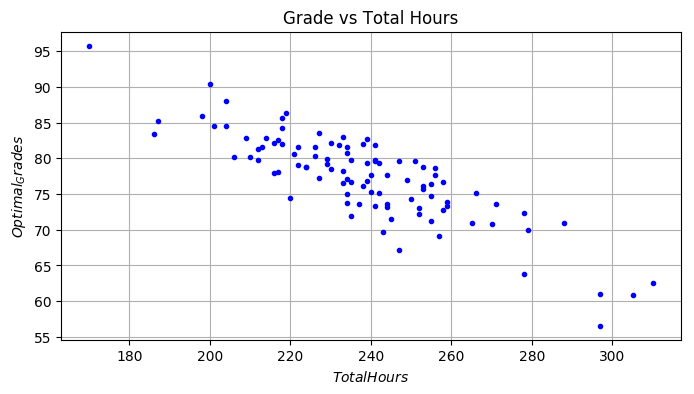

In [57]:
using PyPlot
figure(figsize=(8,4))
plot( xaxis, yaxis, "b." )
xlabel(L" Total Hours")
ylabel(L" Optimal_Grades");
title("Grade vs Total Hours")
grid()


## Network flow model using arc variables ##

The following Julia model is for the network flow based on the section 2 math model. In this code, variables express all arcs in the flow. The flow starts from the source, which is providing the total hours (120h) that can be used for this project. The total time is divided among the 4 people in the following nodes, and each person can work for maximum of 30 hours.

The next arcs are connecting each person to all 21 tasks, and these tasks are separated to 6 subparts (intro, math, solution, results, conclusion, and aesthetics). As shown in the math model, each subpart has a required time component, and this is expressed in the constraints found in the code. In this model, it is assumed that each task should have a minimum required investment of 1 hour.

In this model, each person has their own strengths, and each subpart consists of specified tasks. These dependencies are implemented by using constraints in the code.

The essential part for creating the netwok flow model is creating balance for each node. In this model, the time entering into a node must be equal to the time leaving the node. This balance is expressed using constraints in the code.

The object of the network flow is to maximize the flow generated from the source (identical to maximizing the feedback flow from the sink to source). After we run this Julia model, a feasible (max flow 120h) result is obtained.
The strength of the code is that we can easily change the model conditions. For example, if each person's strength was changed, we can realize the new situation by changing the parameter sets in the first part of the code. We can easily check whether the model is feasible or not by changing the parameters.


### Data Section

In [74]:
dol = [:dol]
tat = [:tat]
dav = [:dav]
joj = [:joj]

tasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t17, :t18, :t19, :t20, :t21]

dol_ntasks = [:t6, :t7, :t8, :t9, :t10, :t12, :t14, :t15, :t16, :t20, :t21] #dol doesn't have these strengths
tat_ntasks = [:t1, :t2, :t3, :t10, :t11, :t13, :t14, :t17, :t18, :t19, :t21] #tat doesn't have these strengths
dav_ntasks = [:t1, :t2, :t4, :t8, :t12, :t13, :t14, :t16, :t17, :t19, :t20] #dav doesn't have these strengths
joj_ntasks = [:t2, :t3, :t4, :t9, :t10, :t13, :t15, :t16, :t18, :t20, :t21] #joj doesn't have these strengths

intro = [:t1, :t2, :t3, :t4]
math = [:t5, :t6, :t7, :t8]
solution = [:t9, :t10, :t11]
results = [:t12, :t13, :t14, :t15, :t16]
conclusion = [:t17, :t18]
aesthetics = [:t19, :t20, :t21]

intro_ntasks = [:t5, :t6, :t7, :t8, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t17, :t18, :t19, :t20, :t21]
#intro doesn't include these tasks
math_ntasks = [:t1, :t2, :t3, :t4, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t17, :t18, :t19, :t20, :t21]
#math doesn't include these tasks
solution_ntasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t12, :t13, :t14, :t15, :t16, :t17, :t18, :t19, :t20, :t21]
#solution doesn't include these tasks
results_ntasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t9, :t10, :t11, :t17, :t18, :t19, :t20, :t21]
#results doesn't include these tasks
conclusion_ntasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t19, :t20, :t21]
#conclusion doesn't include these tasks
aesthetics_ntasks = [:t1, :t2, :t3, :t4, :t5, :t6, :t7, :t8, :t9, :t10, :t11, :t12, :t13, :t14, :t15, :t16, :t17, :t18]
#aesthetics doesn't include these tasks

capacity_sub=[15, 25, 25, 25, 5, 5] #each subpart has to meet these requirements

num_from_tasks =  Dict(zip(tasks,1*ones(length(tasks)))) #all of 21 tasks should be done at least 1hour
;

### Code Section

In [75]:


using JuMP, Clp

m = Model(solver=ClpSolver())

@variable(m, source_dol[[:source],dol] >=0 ) #arc from source to dol
@variable(m, source_tat[[:source],tat] >=0 ) #arc from source to tat
@variable(m, source_dav[[:source],dav] >=0 ) #arc from source to dav
@variable(m, source_joj[[:source],joj] >=0 ) #arc from source to joj

@variable(m, dol_tasks[dol,tasks] >=0 ) #arc from dol to tasks
@variable(m, tat_tasks[tat,tasks] >=0 ) #arc from tat to tasks
@variable(m, dav_tasks[dav,tasks] >=0 ) #arc from dav to tasks
@variable(m, joj_tasks[joj,tasks] >=0 ) #arc from joj to tasks

@variable(m, tasks_intro[tasks,intro] >=0 ) #arc from tasks to intro
@variable(m, tasks_math[tasks,math] >=0 ) #arc from tasks to math
@variable(m, tasks_solution[tasks,solution] >=0 ) #arc from tasks to solution
@variable(m, tasks_results[tasks,results] >=0 ) #arc from tasks to results
@variable(m, tasks_conclusion[tasks,conclusion] >=0 ) #arc from tasks to conclusion
@variable(m, tasks_aesthetics[tasks,aesthetics] >=0 ) #arc from tasks to aesthetics

@variable(m, intro_sink[intro,[:sink]] >=0 ) #arc from intro to sink
@variable(m, math_sink[math,[:sink]] >=0 ) #arc from math to sink
@variable(m, solution_sink[solution,[:sink]] >=0 ) #arc from solution to sink
@variable(m, results_sink[results,[:sink]] >=0 ) #arc from results to sink
@variable(m, conclusion_sink[conclusion,[:sink]] >=0 ) #arc from conclusion to sink
@variable(m, aesthetics_sink[aesthetics,[:sink]] >=0 ) #arc from aesthetics to sink

#total hours of 4 members is 120h
#@constraint(m, so_total[i in [:source]], sum(source_dol[i,j] + source_tat[i,k] + source_dav[i,l] + source_joj[i,m]
#for j in dol for k in tat for l in dav for m in joj) <= num_from_source[i] )

#balance at each division
@constraint(m, dol_b[j in dol],sum(source_dol[i,j] for i in [:source]) == sum(dol_tasks[j,k] for k in tasks) )
@constraint(m, tat_b[j in tat],sum(source_tat[i,j] for i in [:source]) == sum(tat_tasks[j,k] for k in tasks) )
@constraint(m, dav_b[j in dav],sum(source_dav[i,j] for i in [:source]) == sum(dav_tasks[j,k] for k in tasks) )
@constraint(m, joj_b[j in joj],sum(source_joj[i,j] for i in [:source]) == sum(joj_tasks[j,k] for k in tasks) )

#capacity for each division
@constraint(m, dol_c[j in dol],sum(source_dol[i,j] for i in [:source]) <= 30)
@constraint(m, tat_c[j in tat],sum(source_tat[i,j] for i in [:source]) <= 30)
@constraint(m, dav_c[j in dav],sum(source_dav[i,j] for i in [:source]) <= 30)
@constraint(m, joj_c[j in joj],sum(source_joj[i,j] for i in [:source]) <= 30)

#limit each division's tasks (only strengths can be done at each division)
@constraint(m, dolt_c[i in dol], sum(dol_tasks[i,j] for j in dol_ntasks) <=0 )
@constraint(m, tatt_c[i in tat], sum(tat_tasks[i,j] for j in tat_ntasks) <=0 )
@constraint(m, davt_c[i in dav], sum(dav_tasks[i,j] for j in dav_ntasks) <=0 )
@constraint(m, jojt_c[i in joj], sum(joj_tasks[i,j] for j in joj_ntasks) <=0 )

#all of 21 tasks should be done at least 1hour
@constraint(m, tasks_min[j in tasks], sum(dol_tasks[i,j] + tat_tasks[k,j] + dav_tasks[l,j] + joj_tasks[m,j]
for i in dol for k in tat for l in dav for m in joj) >= num_from_tasks[j] )

#balance at each task
@constraint(m, task_b1[j in intro], sum(dol_tasks[i,j] + tat_tasks[l,j] + dav_tasks[m,j] + joj_tasks[n,j]
for i in dol for l in tat for m in dav for n in joj ) == sum(tasks_intro[k,j] for k in tasks ) )
@constraint(m, task_b2[j in math], sum(dol_tasks[i,j] + tat_tasks[l,j] + dav_tasks[m,j] + joj_tasks[n,j]
for i in dol for l in tat for m in dav for n in joj ) == sum(tasks_math[k,j] for k in tasks ) )
@constraint(m, task_b3[j in solution], sum(dol_tasks[i,j] + tat_tasks[l,j] + dav_tasks[m,j] + joj_tasks[n,j]
for i in dol for l in tat for m in dav for n in joj ) == sum(tasks_solution[k,j] for k in tasks ) )
@constraint(m, task_b4[j in results], sum(dol_tasks[i,j] + tat_tasks[l,j] + dav_tasks[m,j] + joj_tasks[n,j]
for i in dol for l in tat for m in dav for n in joj ) == sum(tasks_results[k,j] for k in tasks ) )
@constraint(m, task_b5[j in conclusion], sum(dol_tasks[i,j] + tat_tasks[l,j] + dav_tasks[m,j] + joj_tasks[n,j]
for i in dol for l in tat for m in dav for n in joj ) == sum(tasks_conclusion[k,j] for k in tasks ) )
@constraint(m, task_b6[j in aesthetics], sum(dol_tasks[i,j] + tat_tasks[l,j] + dav_tasks[m,j] + joj_tasks[n,j]
for i in dol for l in tat for m in dav for n in joj ) == sum(tasks_aesthetics[k,j] for k in tasks ) )

#limit each subpart's task (only covered tasks are done in each subpart, tasks exsist only for i==j)
@constraint(m, tasks_intro_c1[i in intro_ntasks], sum(tasks_intro[i,j] for j in intro) <=0 )
@constraint(m, tasks_intro_c2[j in intro], sum(tasks_intro[i,j] for i in tasks) == tasks_intro[j,j] )
@constraint(m, tasks_math_c1[i in math_ntasks], sum(tasks_math[i,j] for j in math) <=0 )
@constraint(m, tasks_math_c2[j in math], sum(tasks_math[i,j] for i in tasks) == tasks_math[j,j] )
@constraint(m, tasks_solution_c1[i in solution_ntasks], sum(tasks_solution[i,j] for j in solution) <=0 )
@constraint(m, tasks_solution_c2[j in solution], sum(tasks_solution[i,j] for i in tasks) == tasks_solution[j,j] )
@constraint(m, tasks_results_c1[i in results_ntasks], sum(tasks_results[i,j] for j in results) <=0 )
@constraint(m, tasks_results_c2[j in results], sum(tasks_results[i,j] for i in tasks) == tasks_results[j,j] )
@constraint(m, tasks_conclusion_c1[i in conclusion_ntasks], sum(tasks_conclusion[i,j] for j in conclusion) <=0 )
@constraint(m, tasks_conclusion_c2[j in conclusion], sum(tasks_conclusion[i,j] for i in tasks) == tasks_conclusion[j,j] )
@constraint(m, tasks_aesthetics_c1[i in aesthetics_ntasks], sum(tasks_aesthetics[i,j] for j in aesthetics) <=0 )
@constraint(m, tasks_aesthetics_c2[j in aesthetics], sum(tasks_aesthetics[i,j] for i in tasks) == tasks_aesthetics[j,j] )

#balance at each subpart
@constraint(m, sub_b1[j in intro], sum(tasks_intro[i,j] for i in tasks) == sum(intro_sink[j,k] for k in [:sink] ) )
@constraint(m, sub_b2[j in math], sum(tasks_math[i,j] for i in tasks) == sum(math_sink[j,k] for k in [:sink] ) )
@constraint(m, sub_b3[j in solution], sum(tasks_solution[i,j] for i in tasks) == sum(solution_sink[j,k] for k in [:sink] ) )
@constraint(m, sub_b4[j in results], sum(tasks_results[i,j] for i in tasks) == sum(results_sink[j,k] for k in [:sink] ) )
@constraint(m, sub_b5[j in conclusion], sum(tasks_conclusion[i,j] for i in tasks) == sum(conclusion_sink[j,k] for k in [:sink] ) )
@constraint(m, sub_b6[j in aesthetics], sum(tasks_aesthetics[i,j] for i in tasks) == sum(aesthetics_sink[j,k] for k in [:sink] ) )

#each subpart has to meet these requirements
@constraint(m, sub_c1[j in [:sink]], sum(intro_sink[i,j] for i in intro) >= capacity_sub[1] )
@constraint(m, sub_c2[j in [:sink]], sum(math_sink[i,j] for i in math) >= capacity_sub[2] )
@constraint(m, sub_c3[j in [:sink]], sum(solution_sink[i,j] for i in solution) >= capacity_sub[3] )
@constraint(m, sub_c4[j in [:sink]], sum(results_sink[i,j] for i in results) >= capacity_sub[4] )
@constraint(m, sub_c5[j in [:sink]], sum(conclusion_sink[i,j] for i in conclusion) >= capacity_sub[5] )
@constraint(m, sub_c6[j in [:sink]], sum(aesthetics_sink[i,j] for i in aesthetics) >= capacity_sub[6] )

#maximize flow from the source
@objective(m, Max, sum( source_dol[i,j] + source_tat[i,l] + source_dav[i,n] + source_joj[i,p]
 for i in [:source] for j in dol for l in tat for n in dav for p in joj ) )

solve(m)

println("Max flow: ", -getobjectivevalue(m)) # need to take negative
status = solve(m)
println()
println("Max flow will be ", getobjectivevalue(m))

println(getvalue(source_dol))
println(getvalue(source_tat))
println(getvalue(source_dav))
println(getvalue(source_joj))
println(getvalue(dol_tasks))
println(getvalue(tat_tasks))
println(getvalue(dav_tasks))
println(getvalue(joj_tasks))
println(getvalue(tasks_intro))
println(getvalue(tasks_math))
println(getvalue(tasks_solution))
println(getvalue(tasks_results))
println(getvalue(tasks_conclusion))
println(getvalue(tasks_aesthetics))
println(getvalue(intro_sink))
println(getvalue(math_sink))
println(getvalue(solution_sink))
println(getvalue(results_sink))
println(getvalue(conclusion_sink))
println(getvalue(aesthetics_sink))


Max flow: -120.0

Max flow will be 120.0
source_dol: 2 dimensions:
[source,:]
  [source,dol] = 30.0
source_tat: 2 dimensions:
[source,:]
  [source,tat] = 30.0
source_dav: 2 dimensions:
[source,:]
  [source,dav] = 30.0
source_joj: 2 dimensions:
[source,:]
  [source,joj] = 30.0
dol_tasks: 2 dimensions:
[dol,:]
  [dol, t1] = 0.0
  [dol, t2] = 1.0
  [dol, t3] = 0.0
  [dol, t4] = 1.0
  [dol, t5] = 0.0
  [dol, t6] = 0.0
  [dol, t7] = 0.0
  [dol, t8] = 0.0
  [dol, t9] = 0.0
  [dol,t10] = 0.0
  [dol,t11] = 19.0
  [dol,t12] = 0.0
  [dol,t13] = 1.0
  [dol,t14] = 0.0
  [dol,t15] = 0.0
  [dol,t16] = 0.0
  [dol,t17] = 4.0
  [dol,t18] = 1.0
  [dol,t19] = 3.0
  [dol,t20] = 0.0
  [dol,t21] = 0.0
tat_tasks: 2 dimensions:
[tat,:]
  [tat, t1] = 0.0
  [tat, t2] = 0.0
  [tat, t3] = 0.0
  [tat, t4] = 0.0
  [tat, t5] = 0.0
  [tat, t6] = 0.0
  [tat, t7] = 0.0
  [tat, t8] = 1.0
  [tat, t9] = 5.0
  [tat,t10] = 0.0
  [tat,t11] = 0.0
  [tat,t12] = 21.0
  [tat,t13] = 0.0
  [tat,t14] = 0.0
  [tat,t15] = 1.0
  [tat,

  [t21,t21] = 1.0
intro_sink: 2 dimensions:
[t1,:]
  [t1,sink] = 29.0
[t2,:]
  [t2,sink] = 1.0
[t3,:]
  [t3,sink] = 4.0
[t4,:]
  [t4,sink] = 1.0
math_sink: 2 dimensions:
[t5,:]
  [t5,sink] = 22.0
[t6,:]
  [t6,sink] = 1.0
[t7,:]
  [t7,sink] = 1.0
[t8,:]
  [t8,sink] = 1.0
solution_sink: 2 dimensions:
[ t9,:]
  [ t9,sink] = 5.0
[t10,:]
  [t10,sink] = 1.0
[t11,:]
  [t11,sink] = 19.0
results_sink: 2 dimensions:
[t12,:]
  [t12,sink] = 21.0
[t13,:]
  [t13,sink] = 1.0
[t14,:]
  [t14,sink] = 1.0
[t15,:]
  [t15,sink] = 1.0
[t16,:]
  [t16,sink] = 1.0
conclusion_sink: 2 dimensions:
[t17,:]
  [t17,sink] = 4.0
[t18,:]
  [t18,sink] = 1.0
aesthetics_sink: 2 dimensions:
[t19,:]
  [t19,sink] = 3.0
[t20,:]
  [t20,sink] = 1.0
[t21,:]
  [t21,sink] = 1.0


## Flow model ##

In the first section of the flow model, we create a vector of strings that label the all the edges of the graph. For visual clarity, we have created line breaks in code below to partition the different types of edges. The first chunk consists of the 4 edges between the source and the divisions, the second chunk consists of the 40 edges between the divisions and tasks, the third chunk consists of the 21 edges between tasks and the parent subpart, the fourth chunk consists of the 6 edges between the subparts and the sink, and the last chunk is the virtual edge from the sink to the source. Using the following list of 33 nodes, we can determine the incidence matrix for the 72 edges uniquely 

$$\begin{bmatrix}
flowsource \\
dol \\
tat \\
dav \\
joj \\
t1 \\
\vdots \\
t_{i} \\
\vdots \\
t21 \\
intro \\
model\\
solution\\
results\\
conclusion \\
aesthetics \\
flowsink
\end{bmatrix}$$

In [59]:
using JuMP, Clp

mflow = Model(solver=ClpSolver())

flowedgename = ["flowsource to dol", "flowsource to tat", "flowsource to dav", "flowsource to joj",
    
    "dol to t1", "dol to t2", "dol to t3", "dol to t4", "dol to t5", "dol to t11", "dol to t13", "dol to t17",
    "dol to t18", "dol to t19", "tat to t4", "tat to t5", "tat to t6", "tat to t7", "tat to t8", "tat to t9",
    "tat to t12", "tat to t15", "tat to t16", "tat to t20", "dav to t3", "dav to t5", "dav to t6", "dav to t7",
    "dav to t9", "dav to t10", "dav to t11", "dav to t15", "dav to t18", "dav to 21", "joj to 1", "joj to 5",
    "joj to 6", "joj to 7", "joj to 8", "joj to 11", "joj to 12", "joj to 14", "joj to 17", "joj to 19",
    
    "t1 to intro", "t2 to intro", "t3 to intro", "t4 to intro", "t5 to model", "t6 to model", "t7 to model",
    "t8 to model", "t9 to soln", "t10 to soln", "t11 to soln", "t12 to results", "t13 to results", "t14 to results",
    "t15 to results", "t16 to results", "t17 to concln", "t18 to concln", "t19 to aesth", "t20 to aesth",
    "t21 to aesth",
    
    "intro to flowsink", "model to flowsink", "soln to flowsink", "results to flowsink", "concln to flowsink",
    "aesth to flowsink",
    
    "flowsink to flowsource (virtual)"]

# incidence matrix:
# col:    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
Aflow = [ 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
         -1  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  1  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  1  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  1  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1  1 ]

;

Next, we continue defining the model by initializing a variable of length 72 representing the flow on each edge, and creating the balance constraint. Since we are solving this max flow model with a virtual edge, we set the supply/demand at each node to be 0. The other capacity constraints model the specifics of our problem. The edges between the source and divisions are capped at a flow of 30, since we do not want any division working more than 30 units of effort. Each edge between a task and its parent subpart has a minimum capacity of 1, so that we ensure at least 1 unit of effort is devote to it in the max flow. Similarly, the edges between the subparts and the sink have minimum capacities to model the minimum number of effort units we wish to flow through the subpart nodes.

In [60]:
# there are 72 edges
@variable(mflow, xflow[1:72] >= 0)

# supply and demand is 0 at each node (they are relays)
bflow = zeros(33)

# balance constraint
@constraint(mflow, Aflow*xflow .== bflow)

# edge capacities
@constraint(mflow, uppercap[i in 1:4], xflow[i] <= 30)
@constraint(mflow, task_req[i in 45:65], xflow[i] >= 1)
@constraint(mflow, intro_req, xflow[66] >= 15)
@constraint(mflow, model_req, xflow[67] >= 25)
@constraint(mflow, soln_req, xflow[68] >= 25)
@constraint(mflow, results_req, xflow[69] >= 25)
@constraint(mflow, concln_req, xflow[70] >= 5)
@constraint(mflow, aesth_req, xflow[71] >= 5)

;

To finish the model, we maximize the flow going through the virtual edge. The chunk of print statements allows us to print the edge name with the amount of flow going through the edge.

In [61]:
# minimizing the cost = maximizing flow through virtual edge 
@objective(mflow, Min, -xflow[72])

solve(mflow)
xflowsol = getvalue(xflow)

println("Max flow is ", (-1)*getobjectivevalue(mflow))
for i in 1:length(xflow)
    if getvalue(xflow[i]) > 0.0001
        println("Edge ", flowedgename[i] , " has flow " , getvalue(xflow[i]))
    end
end

Max flow is 120.0
Edge flowsource to dol has flow 30.0
Edge flowsource to tat has flow 30.0
Edge flowsource to dav has flow 30.0
Edge flowsource to joj has flow 30.0
Edge dol to t2 has flow 1.0
Edge dol to t11 has flow 1.0
Edge dol to t13 has flow 21.0
Edge dol to t17 has flow 5.0
Edge dol to t18 has flow 1.0
Edge dol to t19 has flow 1.0
Edge tat to t4 has flow 6.0
Edge tat to t6 has flow 1.0
Edge tat to t7 has flow 1.0
Edge tat to t8 has flow 1.0
Edge tat to t9 has flow 1.0
Edge tat to t12 has flow 1.0
Edge tat to t15 has flow 1.0
Edge tat to t16 has flow 1.0
Edge tat to t20 has flow 17.0
Edge dav to t3 has flow 1.0
Edge dav to t10 has flow 28.0
Edge dav to 21 has flow 1.0
Edge joj to 1 has flow 7.0
Edge joj to 5 has flow 22.0
Edge joj to 14 has flow 1.0
Edge t1 to intro has flow 7.0
Edge t2 to intro has flow 1.0
Edge t3 to intro has flow 1.0
Edge t4 to intro has flow 6.0
Edge t5 to model has flow 22.0
Edge t6 to model has flow 1.0
Edge t7 to model has flow 1.0
Edge t8 to model has fl

## Longest path model ##

Now, we wish to calculate the time it takes to complete the project by computing the longest path. Again, we begin by creating a vector of edge names and the associated incidence matrix. The vector of nodes used is 

$$\begin{bmatrix}
pathsource \\
t1 \\
\vdots \\
t_{i} \\
\vdots \\
t21 \\
intro \\
model\\
solution\\
results\\
conclusion \\
aesthetics \\
pathsink
\end{bmatrix}$$

In [62]:
using JuMP, Clp

pathedgename = ["pathsource to t1", "pathsource to t4", "t1 to intro", "t1 to t2", "t1 to t3", "t1 to t5",
    "t2 to intro", "t3 to intro", "t4 to intro", "t5 to model", "t5 to t6", "t5 to t7", "t6 to model",
    "t6 to t8", "t7 to model", "t7 to t8", "t8 to model", "t8 to t9", "t9 to soln", "t9 to t10", "t9 to t11",
    "t10 to soln", "t11 to soln", "t11 to t12", "t11 to t13", "t12 to results", "t13 to results", "t13 to t14",
    "t14 to results", "t14 to t15", "t14 to t16", "t15 to results", "t15 to t17", "t16 to results", "t17 to concln",
    "t17 to t18", "t18 to concln", "intro to aesth", "model to aesth", "soln to aesth", "results to aesth",
    "concln to aesth", "aesth to t19", "aesth to t20", "aesth to t21", "t19 to pathsink", "t20 to pathsink",
    "t21 to pathsink"]

# incidence matrix:
# col:    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
Apath = [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         -1  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0 -1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1
          0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  1  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  1  1  1  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 ]

;

We then initialize variables for the flow on each of the 48 edges and define a vector for the supply and demand of the nodes. Besides the source and sink, all nodes have supply and demand of 0. The source has a supply of 1 and the sink has a demand of 1. Using the incidence matrix, we can write out the constraint.

In [63]:
# supply and demand
# only the source and sink have supply and demand
bpath = vcat([1], zeros(27), [-1])

mpath = Model(solver=ClpSolver())

@variable(mpath, xpath[1:48] >= 0)
@constraint(mpath, Apath*xpath .== bpath)

;

Next, we define the weight of the edge as the time it takes to complete each task and we set the objective as the dot product between this weight vector and the vector of flows. Recall that flows are either 0 or 1, depending on if a particular edge is on the longest path. The last chunk prints out an edge name if it is on the longest path.

In [64]:
# distances
# this should be updated with the actual baseline times we want to give it
cpath = 10*ones(48)

@objective(mpath, Max, dot(cpath,xpath))

solve(mpath)
xpathsol = getvalue(xpath)

println("Earliest completion time: ", getobjectivevalue(mpath))
for i in 1:length(xpath)
    if getvalue(xpath[i]) > 0.0001
        println("Edge ", pathedgename[i] , " is on the critical path")
    end
end

Earliest completion time: 150.0
Edge pathsource to t1 is on the critical path
Edge t1 to t5 is on the critical path
Edge t5 to t7 is on the critical path
Edge t7 to t8 is on the critical path
Edge t8 to t9 is on the critical path
Edge t9 to t11 is on the critical path
Edge t11 to t13 is on the critical path
Edge t13 to t14 is on the critical path
Edge t14 to t15 is on the critical path
Edge t15 to t17 is on the critical path
Edge t17 to t18 is on the critical path
Edge t18 to concln is on the critical path
Edge concln to aesth is on the critical path
Edge aesth to t19 is on the critical path
Edge t19 to pathsink is on the critical path


### Joint Model

This code is similar to that of the max flow model and longest path model. We still use the decision variables $x^{flow}$ and include all the constraints from the max flow model. The most important changes we have made are to use the dual variables from the interior maximization of the longest path model, $\nu$, and rewrite the original cost function as a constraint and the original constraint as a cost function. The edge weights here a function of both the baseline edge weight and the amount of flow through the corresponding edge ($c/x^{flow}$). We also note here that we wrote out the constraints explicitly, because the solvers did not seem to recognize the problem as convex while it was in matrix form.

In [65]:
using JuMP, Mosek

mjoint = Model(solver=MosekSolver())

flowedgename = ["flowsource to dol", "flowsource to tat", "flowsource to dav", "flowsource to joj",
    
    "dol to t1", "dol to t2", "dol to t3", "dol to t4", "dol to t5", "dol to t11", "dol to t13", "dol to t17",
    "dol to t18", "dol to t19", "tat to t4", "tat to t5", "tat to t6", "tat to t7", "tat to t8", "tat to t9",
    "tat to t12", "tat to t15", "tat to t16", "tat to t20", "dav to t3", "dav to t5", "dav to t6", "dav to t7",
    "dav to t9", "dav to t10", "dav to t11", "dav to t15", "dav to t18", "dav to t21", "joj to t1", "joj to t5",
    "joj to t6", "joj to t7", "joj to t8", "joj to t11", "joj to t12", "joj to t14", "joj to t17", "joj to t19",
    
    "t1 to intro", "t2 to intro", "t3 to intro", "t4 to intro", "t5 to model", "t6 to model", "t7 to model",
    "t8 to model", "t9 to soln", "t10 to soln", "t11 to soln", "t12 to results", "t13 to results", "t14 to results",
    "t15 to results", "t16 to results", "t17 to concln", "t18 to concln", "t19 to aesth", "t20 to aesth",
    "t21 to aesth",
    
    "intro to flowsink", "model to flowsink", "soln to flowsink", "results to flowsink", "concln to flowsink",
    "aesth to flowsink",
    
    "flowsink to flowsource (virtual)"]

# there are 72 flow edges and 29 dual variables
@variable(mjoint, xjflow[1:72] >= 0)
@variable(mjoint, nu[1:29] >= 0)

# incidence matrix:
# col:    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
Aflow = [ 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
         -1  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  1  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  1  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  1  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1  1 ]

# I apologize for the number of constraints in advance...
# for some reason unclear to me the solvers weren't working right with them in matrix form
# I multiplied out the matrices and wrote down the rows below

# Aflow*xjflow = bflow
@constraint(mjoint, xjflow[1] + xjflow[2] + xjflow[3] + xjflow[4] - xjflow[72] == 0)
@constraint(mjoint, -xjflow[1] + xjflow[5] + xjflow[6] + xjflow[7] + xjflow[8] + xjflow[9] + xjflow[10]
    + xjflow[11] + xjflow[12] + xjflow[13] + xjflow[14] == 0)
@constraint(mjoint, -xjflow[2] + xjflow[15] + xjflow[16] + xjflow[17] + xjflow[18] + xjflow[19] + xjflow[20]
    + xjflow[21] + xjflow[22] + xjflow[23] + xjflow[24] == 0)
@constraint(mjoint, -xjflow[3] + xjflow[25] + xjflow[26] + xjflow[27] + xjflow[28] + xjflow[29] + xjflow[30]
    + xjflow[31] + xjflow[32] + xjflow[33] + xjflow[34] == 0)
@constraint(mjoint, -xjflow[4] + xjflow[35] + xjflow[36] + xjflow[37] + xjflow[38] + xjflow[39] + xjflow[40]
    + xjflow[41] + xjflow[42] + xjflow[43] + xjflow[44] == 0)
@constraint(mjoint, -xjflow[5] - xjflow[35] + xjflow[45] == 0)
@constraint(mjoint, -xjflow[6] + xjflow[46] == 0)
@constraint(mjoint, -xjflow[7] - xjflow[25] + xjflow[47] == 0)
@constraint(mjoint, -xjflow[8] - xjflow[15] + xjflow[48] == 0)
@constraint(mjoint, -xjflow[9] - xjflow[16] - xjflow[26] - xjflow[36] + xjflow[49] == 0)
@constraint(mjoint, -xjflow[17] - xjflow[27] - xjflow[37] + xjflow[50] == 0)
@constraint(mjoint, -xjflow[18] - xjflow[28] - xjflow[38] + xjflow[51] == 0)
@constraint(mjoint, -xjflow[19] - xjflow[39] + xjflow[52] == 0)
@constraint(mjoint, -xjflow[20] - xjflow[29] + xjflow[53] == 0)
@constraint(mjoint, -xjflow[30] + xjflow[54] == 0)
@constraint(mjoint, -xjflow[10] - xjflow[31] - xjflow[40] + xjflow[55] == 0)
@constraint(mjoint, -xjflow[21] - xjflow[41] + xjflow[56] == 0)
@constraint(mjoint, -xjflow[11] + xjflow[57] == 0)
@constraint(mjoint, -xjflow[42] + xjflow[58] == 0)
@constraint(mjoint, -xjflow[22] - xjflow[32] + xjflow[59] == 0)
@constraint(mjoint, -xjflow[23] + xjflow[60] == 0)
@constraint(mjoint, -xjflow[12] - xjflow[43] + xjflow[61] == 0)
@constraint(mjoint, -xjflow[13] - xjflow[33] + xjflow[62] == 0)
@constraint(mjoint, -xjflow[14] - xjflow[44] + xjflow[63] == 0)
@constraint(mjoint, -xjflow[24] + xjflow[64] == 0)
@constraint(mjoint, -xjflow[34] + xjflow[65] == 0)
@constraint(mjoint, -xjflow[45] - xjflow[46] - xjflow[47] - xjflow[48] + xjflow[66] == 0)
@constraint(mjoint, -xjflow[49] - xjflow[50] - xjflow[51] - xjflow[52] + xjflow[67] == 0)
@constraint(mjoint, -xjflow[53] - xjflow[54] - xjflow[55] + xjflow[68] == 0)
@constraint(mjoint, -xjflow[56] - xjflow[57] - xjflow[58] - xjflow[59] - xjflow[60] + xjflow[69] == 0)
@constraint(mjoint, -xjflow[61] - xjflow[62] + xjflow[70] == 0)
@constraint(mjoint, -xjflow[63] - xjflow[64] - xjflow[65] + xjflow[71] == 0)
@constraint(mjoint, -xjflow[66] - xjflow[67] - xjflow[68] - xjflow[69] - xjflow[70] - xjflow[71] + xjflow[72] == 0)


# incidence matrix:
# col:    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
Apath = [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         -1  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0 -1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1
          0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  1  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  1  1  1  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 ]

c = ones(48)*10

# Apath^{T}v - C'/xjflow ≥ 0
@NLconstraint(mjoint, c[1]/xjflow[45] - nu[1] + nu[2] <= 0)    #source to 1
@NLconstraint(mjoint, c[2]/xjflow[48] - nu[1] + nu[5] <= 0)    #source to 4

@constraint(mjoint, nu[2] - nu[23] - c[3] >= 0)               #1 to intro
@NLconstraint(mjoint, c[4]/xjflow[46] - nu[2] + nu[3] <= 0)    #1 to 2
@NLconstraint(mjoint, c[5]/xjflow[47] - nu[2] + nu[4] <= 0)    #1 to 3
@NLconstraint(mjoint, c[6]/xjflow[49] - nu[2] + nu[6] <= 0)    #1 to 5
@constraint(mjoint, nu[3] - nu[23] - c[7] >= 0)               #2 to intro
@constraint(mjoint, nu[4] - nu[23] - c[8] >= 0)               #3 to intro
@constraint(mjoint, nu[5] - nu[23] - c[9] >= 0)               #4 to intro

@constraint(mjoint, nu[6] - nu[24] - c[10] >= 0)               #5 to models
@NLconstraint(mjoint, c[11]/xjflow[50] - nu[6] + nu[7] <= 0)    #5 to 6
@NLconstraint(mjoint, c[12]/xjflow[51] - nu[6] + nu[8] <= 0)    #5 to 7
@constraint(mjoint, nu[7] - nu[24] - c[13] >= 0)               #6 to models
@NLconstraint(mjoint, c[14]/xjflow[52] - nu[7] + nu[9] <= 0)    #6 to 8
@constraint(mjoint, nu[8] - nu[24] - c[15] >= 0)               #7 to models
@NLconstraint(mjoint, c[16]/xjflow[52] - nu[8] + nu[9] <= 0)    #7 to 8
@constraint(mjoint, nu[9] - nu[24] - c[17] >= 0)               #8 to models
@NLconstraint(mjoint, c[18]/xjflow[53] - nu[9] + nu[10] <= 0)   #8 to 9

@constraint(mjoint, nu[10] - nu[25] - c[19] >= 0)              #9 to solution
@NLconstraint(mjoint, c[20]/xjflow[54] - nu[10] + nu[11] <= 0)  #9 to 10
@NLconstraint(mjoint, c[21]/xjflow[55] - nu[10] + nu[12] <= 0)  #9 to 11
@constraint(mjoint, nu[11] - nu[25] - c[22] >= 0)              #10 to solution
@constraint(mjoint, nu[12] - nu[25] - c[23] >= 0)              #11 to solution
@NLconstraint(mjoint, c[24]/xjflow[56] - nu[12] + nu[13] <= 0)  #11 to 12
@NLconstraint(mjoint, c[25]/xjflow[57] - nu[12] + nu[14] <= 0)  #11 to 13

@constraint(mjoint, nu[13] - nu[26] - c[26] >= 0)              #12 to results
@constraint(mjoint, nu[14] - nu[26] - c[27] >= 0)              #13 to results
@NLconstraint(mjoint, c[28]/xjflow[58] - nu[14] + nu[15] <= 0)  #13 to 14
@constraint(mjoint, nu[15] - nu[26] - c[29] >= 0)              #14 to results
@NLconstraint(mjoint, c[30]/xjflow[59] - nu[15] + nu[16] <= 0)  #14 to 15
@NLconstraint(mjoint, c[31]/xjflow[60] - nu[15] + nu[17] <= 0)  #14 to 16
@constraint(mjoint, nu[16] - nu[26] - c[32] >= 0)              #15 to results
@NLconstraint(mjoint, c[33]/xjflow[61] - nu[16] + nu[18] <= 0)  #15 to 17
@constraint(mjoint, nu[17] - nu[26] - c[34] >= 0)              #16 to results

@constraint(mjoint, nu[18] - nu[27] - c[35] >= 0)              #17 to conclusion
@NLconstraint(mjoint, c[36]/xjflow[62] - nu[18] + nu[19] <= 0)  #17 to 18
@constraint(mjoint, nu[19] - nu[27] - c[37] >= 0)              #18 to conclusion

@constraint(mjoint, nu[23] - nu[28] - c[38] >= 0)              #intro to aesth
@constraint(mjoint, nu[24] - nu[28] - c[39] >= 0)              #models to aesth
@constraint(mjoint, nu[25] - nu[28] - c[40] >= 0)              #solution to aesth
@constraint(mjoint, nu[26] - nu[28] - c[41] >= 0)              #results to aesth
@constraint(mjoint, nu[27] - nu[28] - c[42] >= 0)              #conclusion to aesth

@NLconstraint(mjoint, c[43]/xjflow[63] - nu[28] + nu[20] <= 0)  #aesth to 19
@NLconstraint(mjoint, c[44]/xjflow[64] - nu[28] + nu[21] <= 0)  #aesth to 20
@NLconstraint(mjoint, c[45]/xjflow[65] - nu[28] + nu[22] <= 0)  #aesth to 21

@constraint(mjoint, nu[20] - nu[29] - c[46] >= 0)              #19 to sink
@constraint(mjoint, nu[21] - nu[29] - c[47] >= 0)              #20 to sink
@constraint(mjoint, nu[22] - nu[29] - c[48] >= 0)              #21 to sink

# max flow model constraints
@constraint(mjoint, uppercap[i in 1:4], xjflow[i] <= 30)
@constraint(mjoint, task_req[i in 45:65], xjflow[i] >= 1)
@constraint(mjoint, intro_req, xjflow[66] >= 15)
@constraint(mjoint, model_req, xjflow[67] >= 25)
@constraint(mjoint, soln_req, xjflow[68] >= 25)
@constraint(mjoint, results_req, xjflow[69] >= 25)
@constraint(mjoint, concln_req, xjflow[70] >= 5)
@constraint(mjoint, aesth_req, xjflow[71] >= 5)


# minimizing the b^{T}nu
@objective(mjoint, Min, nu[1] - nu[29])

solve(mjoint)


LoadError: [91mArgumentError: Module Mosek not found in current path.
Run `Pkg.add("Mosek")` to install the Mosek package.[39m

## 5. Results and discussion ##

### 5.A. Transportation Models

![fixit flowchart][flow3]

[flow3]:https://i.imgur.com/Oh0M9bo.png)




Both forms of code, despite the fact that the second has the aditional (fairly restrictive) constraint that limits group members to only being able to work on certain tasks, share extremely similar optimal values. It is surprisingly difficult to tinker with the arbitrary data values to create optimal values that are not identical. The original values were more reality-oriented and implied that each task would be worth approximately the same (4-5%) and each task would take approximately the same amount of time (1-3 hrs). It is extremely rare (I failed on every attempt) to pick reasonable values and have different resulting scores, even while heavily skewing tasks that were unique to a single person.

Intuitively, I would not have expected this to be the case, but I suppose it's because of of the wide scope of the "specialization". Each group member is able to preform 10/21 tasks, and due to random chance in selection, so very few tasks are unique. Additionally, because reasonable values for the difficulty and reward of these tasks fall into a narrow range, and there are so many of them, there are many optimal assignments. This means that it would take seriously unconventional data or unreasonably narrow skillsets (for a class project) to make a significant change. Thus, as the model stands, we can conclude that moderate specialization has little effect on the feasibility of a project. 

There's an extremely interesting application of this result:
It's very doable to create a statistical function that describes the expected number of unique tasks. Using this function, it should be possible to derive an expression relating the degree of specialization (avg task proficiency / number of tasks) to the sensitivity of the objective. 

Here's why this is interesting: suppose you own a business where certain employees are specialized to tasks that are worth a certain amount of revenue. In cases where there's low crosstraining, certain individuals are huge liabilities for loss in the case of illness, quitting, and the like. That is, this concept could be an excellent way to model a business's [Bus Factor](https://en.wikipedia.org/wiki/Bus_factor)! This potential model would be a huge asset in risk management, revealing risky employees and identifying areas for crosstraining or hiring.  

### 5.B. MIP
We wanted to see the change in optimal value by changing hours needed per task. Since each task has certain rewards points, changing the hours needed per task would change the optimal grade as our model will suggest us to work on those tasks that has higher grade value. Hence, for the same total hours needed, we could optimize our grade by working on the tasks that has the most reward. The following solution is one of the result with set of following workload for each task.
[16.0, 8.0, 3.0, 13.0, 17.0, 5.0, 18.0, 3.0, 6.0, 7.0, 6.0, 6.0, 8.0, 10.0, 18.0, 10.0, 9.0, 10.0, 14.0, 14.0, 17.0]

Reward for each task:
reward=[4; 8; 4; 2; 8; 2; 8; 2; 8; 2; 8; 2; 8; 2; 8; 5; 4; 4; 4; 4; 4]

Hence, the model is suggesting us to ignore tasks 1,4,10,12,14,20 and 21 with consecutive grades 4,2,2, 2, 2, 4 and 4. The model did not ignore any of the tasks which has the maximum reward points like 8 and 5.

Optimal grade :76.5

Value of X[2,1] 8.0

Value of X[3,1] 3.0

Value of X[5,2] 17.0

Value of X[6,2] 3

Value of X[7,4] 18.0

Value of X[8,4] 3.0

Value of X[9,3] 6

Value of X[11,3] 6

Value of X[13,1] 8.0

Value of X[15,3] 18.0

Value of X[16,2] 10.0

Value of X[17,4] 9

Value of X[18,1] 10.0

Value of X[19,1] 1

Total hours used: 120.0

Total task completed: 14


### 5.C. Flow Networks

#### Network flow model using arc variables
By seeing results by the Julia code, we can understand the given network flow model and constraints give feasible solutions. Although maximum flow of this model can be 120h, there are several possible solutions for the amount of each arc. It is confirmed that this Julia code is working correctly by comparing the amount of each arc to given constraints. As mentioned in section 3, this model can easily change given conditions and constraints by adjusting parameters in the first part of the codes.

In the network flow model, it is assumed that each task should demands at least 1 hour. If we look at the results, we may notice that time taken for each task is imbalanced (ex. DOL works for 25 hours on task 11 , but DOL works for 0 or 1 hour on other tasks). In the reality, one person should not concentrate all of their time on a specific task, and should distribute their effort. To solve this problem, we can extend the network flow model by converting it into a MIP for additional constraints. Doing so allows us to use indicator variables corresponding to each arc variable (from persons to tasks). Then we can use the same idea suggested in the section 2 MIP model: 

1. $Z_{doer,task}$ is a binary variable that defines if the task will be done by the doer 
2. $X_{doer,task}$ is a variable defines the amount of hours spent on each task by the doer

One example of the new constraints is expressed below.

$X_{doer=1,task=2}$ $>= 5 \times$ $Z_{doer=1,task=1}$ 

The meaning of this constraint is that if task1 is done by doer1, task2 should be done for more than 5 hours by doer1. If we connect each task by using indicator variables like this example, we can get more balanced results for each task.

#### Incidence Flow Network
The results for the max flow model are shown in the print statement below. Max flows in general are not unique, so the interpretation of this model is that we can feasibly satisfy the project constraints, while giving each division a maximum workload. As expected, the flows through all edges are integral since the costs and constraints are integral, and the incidence matrix is totally unimodular. Thus, each division can expect to put in a full 30 units of effort towards the project. This particular max flow seems to concentrate workers on a few tasks. The DOL division spends most effort on task 13, the TAT division spends most effort on task 20, the DAV division spends all but 2 units of effort on task 28, and the JOJ division spends most effort on task 5. Most of the extra effort seems to end up in aesthetics, which is allocated nearly 400% of its minimum effort requirement.

In [66]:
println("Max flow is ", (-1)*getobjectivevalue(mflow))
for i in 1:length(xflow)
    if getvalue(xflow[i]) > 0.0001
        println("Edge ", flowedgename[i] , " has flow " , getvalue(xflow[i]))
    end
end

Max flow is 120.0
Edge flowsource to dol has flow 30.0
Edge flowsource to tat has flow 30.0
Edge flowsource to dav has flow 30.0
Edge flowsource to joj has flow 30.0
Edge dol to t2 has flow 1.0
Edge dol to t11 has flow 1.0
Edge dol to t13 has flow 21.0
Edge dol to t17 has flow 5.0
Edge dol to t18 has flow 1.0
Edge dol to t19 has flow 1.0
Edge tat to t4 has flow 6.0
Edge tat to t6 has flow 1.0
Edge tat to t7 has flow 1.0
Edge tat to t8 has flow 1.0
Edge tat to t9 has flow 1.0
Edge tat to t12 has flow 1.0
Edge tat to t15 has flow 1.0
Edge tat to t16 has flow 1.0
Edge tat to t20 has flow 17.0
Edge dav to t3 has flow 1.0
Edge dav to t10 has flow 28.0
Edge dav to 21 has flow 1.0
Edge joj to 1 has flow 7.0
Edge joj to 5 has flow 22.0
Edge joj to 14 has flow 1.0
Edge t1 to intro has flow 7.0
Edge t2 to intro has flow 1.0
Edge t3 to intro has flow 1.0
Edge t4 to intro has flow 6.0
Edge t5 to model has flow 22.0
Edge t6 to model has flow 1.0
Edge t7 to model has flow 1.0
Edge t8 to model has fl

### 5.D. Longest Path
The results for the longest path model are shown in the print statement below. The earliest completion time is integral, again, because all weights are integral.

In [67]:
println("Earliest completion time: ", getobjectivevalue(mpath))
for i in 1:length(xpath)
    if getvalue(xpath[i]) > 0.0001
        println("Edge ", pathedgename[i] , " is on the critical path")
    end
end

Earliest completion time: 150.0
Edge pathsource to t1 is on the critical path
Edge t1 to t5 is on the critical path
Edge t5 to t7 is on the critical path
Edge t7 to t8 is on the critical path
Edge t8 to t9 is on the critical path
Edge t9 to t11 is on the critical path
Edge t11 to t13 is on the critical path
Edge t13 to t14 is on the critical path
Edge t14 to t15 is on the critical path
Edge t15 to t17 is on the critical path
Edge t17 to t18 is on the critical path
Edge t18 to concln is on the critical path
Edge concln to aesth is on the critical path
Edge aesth to t19 is on the critical path
Edge t19 to pathsink is on the critical path


### 5.E Combined

The results flows chosen for the joint model are shown in the print statement below. Probably the first notable aspect of the result is that the flows chosen are no longer integral. Similarly, the longest path is no longer integral. Its length is 46.05... This is because the modified weights are non-integral after dividing the baseline by the flow. The next striking aspect of this result is that each division sends nonzero flow to *every possible task!* Each division has 10 task capabilities, and in this model, they will allocate effort to each one.

The intuition behind this result is as follows. Consider a simple version of the longest path problem with only two edges, $(s,u)$ and $(u,t)$. The edges have weights $C/x$ and $C/y$ respectively. We get to choose $x$ and $y$ to be any positive real as long as we satisfy the constraint $x+y=k$. Then we wish to minimize the longest path computed as $C/x + C/y$.

Through elementary operations, $C/x + C/y = \frac{Cy + Cx}{xy} = \frac{C(y + x)}{xy}$. Then since $y+x=k$, this expression is just $\frac{Ck}{xy}$. Thus, we wish to choose $x,y$ to maximize $x*y$; this is when $x=y$, which follows from the AM-GM inequality.

We see from this toy example, that it is better to "distribute" the total flow available through as many edges in a critical path as possible, rather than concentrating it on a few nodes. This helps us to see why the optimal solution sends at least a small amount of flow through each available edge.

In [68]:
println("Earliest completion time: ", getobjectivevalue(mjoint))

for i in 1:length(xjflow)
    if getvalue(xjflow[i]) > 0.0001
        println("Edge ", flowedgename[i] , " has flow " , getvalue(xjflow[i]))
    end
end

LoadError: [91mUndefVarError: mjoint not defined[39m

Now, we wish to find the actual path that is being constrained. It is not immediately clear that taking the dual of the joint optimization program will give us the right answer. That is, we have a mapping of $x^{path}$ within the interior maximization to its dual $nu$, and a mapping from $nu$ to the exterior problem. However, we are not sure the that the dual of $nu$ in the exterior problem maps back to the $x^{path}$ variables in the original minimax formulation.

Fortunately, we can bypass these considerations by just running a new longest path model and explicitly using the flows found in the joint optimization problem. We provide this code below - it is nearly identical to the original longest path formulation, except now the modified edge constraints are written out explicitly in the objective function.

In [69]:
using JuMP, Mosek

pathedgename = ["pathsource to t1", "pathsource to t4", "t1 to intro", "t1 to t2", "t1 to t3", "t1 to t5",
    "t2 to intro", "t3 to intro", "t4 to intro", "t5 to model", "t5 to t6", "t5 to t7", "t6 to model",
    "t6 to t8", "t7 to model", "t7 to t8", "t8 to model", "t8 to t9", "t9 to soln", "t9 to t10", "t9 to t11",
    "t10 to soln", "t11 to soln", "t11 to t12", "t11 to t13", "t12 to results", "t13 to results", "t13 to t14",
    "t14 to results", "t14 to t15", "t14 to t16", "t15 to results", "t15 to t17", "t16 to results", "t17 to concln",
    "t17 to t18", "t18 to concln", "intro to aesth", "model to aesth", "soln to aesth", "results to aesth",
    "concln to aesth", "aesth to t19", "aesth to t20", "aesth to t21", "t19 to pathsink", "t20 to pathsink",
    "t21 to pathsink"]

# incidence matrix:
# col:    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
Apath = [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         -1  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0 -1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1
          0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  1  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  1  1  1  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 ]

# supply and demand
# only the source and sink have supply and demand
bpath = vcat([1], zeros(27), [-1])

mjpath = Model(solver=MosekSolver())

@variable(mjpath, xjpath[1:48] >= 0)
@constraint(mjpath, Apath*xjpath .== bpath)

# distances
# this should be updated with the actual baseline times we want to give it
c = ones(48)*10

xjfloow = ones(72)

for i in 1:72
    xjfloow[i] = getvalue(xjflow[i])
end

@expression(mjpath, obj, c[1]/(xjfloow[45])*xjpath[1] +
    c[2]/(xjfloow[48])*xjpath[2] +
    c[3]*xjpath[3] + 
    c[4]/(xjfloow[46])*xjpath[4] +
    c[5]/(xjfloow[47])*xjpath[5] +
    c[6]/(xjfloow[49])*xjpath[6] +
    c[7]*xjpath[7] +
    c[8]*xjpath[8] +
    c[9]*xjpath[9] +
    c[10]*xjpath[10] +
    c[11]/(xjfloow[50])*xjpath[11] +
    c[12]/(xjfloow[51])*xjpath[12] +
    c[13]*xjpath[13] +
    c[14]/(xjfloow[52])*xjpath[14] +
    c[15]*xjpath[15] +
    c[16]/(xjfloow[52])*xjpath[16] +
    c[17]*xjpath[17] +
    c[18]/(xjfloow[53])*xjpath[18] +
    c[19]*xjpath[19] +
    c[20]/(xjfloow[54])*xjpath[20] +
    c[21]/(xjfloow[55])*xjpath[21] +
    c[22]*xjpath[22] +
    c[23]*xjpath[23] +
    c[24]/(xjfloow[56])*xjpath[24] + 
    c[25]/(xjfloow[57])*xjpath[25] + 
    c[26]*xjpath[26] +
    c[27]*xjpath[27] +
    c[28]/(xjfloow[58])*xjpath[28] +
    c[29]*xjpath[29] +
    c[30]/(xjfloow[59])*xjpath[30] +
    c[31]/(xjfloow[60])*xjpath[31] +
    c[32]*xjpath[32] +
    c[33]/(xjfloow[61])*xjpath[33] +
    c[34]*xjpath[34] +
    c[35]*xjpath[35] +
    c[36]/(xjfloow[62])*xjpath[36] +
    c[37]*xjpath[37] +
    c[38]*xjpath[38] +
    c[39]*xjpath[39] +
    c[40]*xjpath[40] +
    c[41]*xjpath[41] +
    c[42]*xjpath[42] +
    c[43]/(xjfloow[63])*xjpath[43] +
    c[44]/(xjfloow[64])*xjpath[44] +
    c[45]/(xjfloow[65])*xjpath[45] +
    c[46]*xjpath[46] +
    c[47]*xjpath[47] +
    c[48]*xjpath[48])

@objective(mjpath, Max, obj)

solve(mjpath)
xjpathsol = getvalue(xjpath)

println("Earliest completion time: ", getobjectivevalue(mjpath))
for i in 1:length(xjpath)
    if getvalue(xjpath[i]) > 0.0001
        println("Edge ", pathedgename[i] , " is on the critical path")
    end
end

LoadError: [91mArgumentError: Module Mosek not found in current path.
Run `Pkg.add("Mosek")` to install the Mosek package.[39m

As a quick test of plausibility, we notice that the earliest completion time is equivalent to that found by the joint maximization problem earlier. Comparing the path to that found by the naive version of the longest path model, we notice that they are the same. This is probably because the topology of our example is nearly sequential. In theory, the methodology developed here would allow us to jointly optimize more complex dependency directed acyclic graphs.

As a last extension of our joint model, we wish to see how each division should allocate their work if we allow each division one more unit of effort. This just involves changing the upper capacity constraints on the source-division edges of the flow graph to 31.

In [70]:
using JuMP, Mosek

mjoint1 = Model(solver=MosekSolver())

# there are 72 flow edges and 29 dual variables
@variable(mjoint1, xjflow1[1:72] >= 0)
@variable(mjoint1, nu1[1:29] >= 0)

# Aflow*xjflow1 = bflow
@constraint(mjoint1, xjflow1[1] + xjflow1[2] + xjflow1[3] + xjflow1[4] - xjflow1[72] == 0)
@constraint(mjoint1, -xjflow1[1] + xjflow1[5] + xjflow1[6] + xjflow1[7] + xjflow1[8] + xjflow1[9] + xjflow1[10]
    + xjflow1[11] + xjflow1[12] + xjflow1[13] + xjflow1[14] == 0)
@constraint(mjoint1, -xjflow1[2] + xjflow1[15] + xjflow1[16] + xjflow1[17] + xjflow1[18] + xjflow1[19] + xjflow1[20]
    + xjflow1[21] + xjflow1[22] + xjflow1[23] + xjflow1[24] == 0)
@constraint(mjoint1, -xjflow1[3] + xjflow1[25] + xjflow1[26] + xjflow1[27] + xjflow1[28] + xjflow1[29] + xjflow1[30]
    + xjflow1[31] + xjflow1[32] + xjflow1[33] + xjflow1[34] == 0)
@constraint(mjoint1, -xjflow1[4] + xjflow1[35] + xjflow1[36] + xjflow1[37] + xjflow1[38] + xjflow1[39] + xjflow1[40]
    + xjflow1[41] + xjflow1[42] + xjflow1[43] + xjflow1[44] == 0)
@constraint(mjoint1, -xjflow1[5] - xjflow1[35] + xjflow1[45] == 0)
@constraint(mjoint1, -xjflow1[6] + xjflow1[46] == 0)
@constraint(mjoint1, -xjflow1[7] - xjflow1[25] + xjflow1[47] == 0)
@constraint(mjoint1, -xjflow1[8] - xjflow1[15] + xjflow1[48] == 0)
@constraint(mjoint1, -xjflow1[9] - xjflow1[16] - xjflow1[26] - xjflow1[36] + xjflow1[49] == 0)
@constraint(mjoint1, -xjflow1[17] - xjflow1[27] - xjflow1[37] + xjflow1[50] == 0)
@constraint(mjoint1, -xjflow1[18] - xjflow1[28] - xjflow1[38] + xjflow1[51] == 0)
@constraint(mjoint1, -xjflow1[19] - xjflow1[39] + xjflow1[52] == 0)
@constraint(mjoint1, -xjflow1[20] - xjflow1[29] + xjflow1[53] == 0)
@constraint(mjoint1, -xjflow1[30] + xjflow1[54] == 0)
@constraint(mjoint1, -xjflow1[10] - xjflow1[31] - xjflow1[40] + xjflow1[55] == 0)
@constraint(mjoint1, -xjflow1[21] - xjflow1[41] + xjflow1[56] == 0)
@constraint(mjoint1, -xjflow1[11] + xjflow1[57] == 0)
@constraint(mjoint1, -xjflow1[42] + xjflow1[58] == 0)
@constraint(mjoint1, -xjflow1[22] - xjflow1[32] + xjflow1[59] == 0)
@constraint(mjoint1, -xjflow1[23] + xjflow1[60] == 0)
@constraint(mjoint1, -xjflow1[12] - xjflow1[43] + xjflow1[61] == 0)
@constraint(mjoint1, -xjflow1[13] - xjflow1[33] + xjflow1[62] == 0)
@constraint(mjoint1, -xjflow1[14] - xjflow1[44] + xjflow1[63] == 0)
@constraint(mjoint1, -xjflow1[24] + xjflow1[64] == 0)
@constraint(mjoint1, -xjflow1[34] + xjflow1[65] == 0)
@constraint(mjoint1, -xjflow1[45] - xjflow1[46] - xjflow1[47] - xjflow1[48] + xjflow1[66] == 0)
@constraint(mjoint1, -xjflow1[49] - xjflow1[50] - xjflow1[51] - xjflow1[52] + xjflow1[67] == 0)
@constraint(mjoint1, -xjflow1[53] - xjflow1[54] - xjflow1[55] + xjflow1[68] == 0)
@constraint(mjoint1, -xjflow1[56] - xjflow1[57] - xjflow1[58] - xjflow1[59] - xjflow1[60] + xjflow1[69] == 0)
@constraint(mjoint1, -xjflow1[61] - xjflow1[62] + xjflow1[70] == 0)
@constraint(mjoint1, -xjflow1[63] - xjflow1[64] - xjflow1[65] + xjflow1[71] == 0)
@constraint(mjoint1, -xjflow1[66] - xjflow1[67] - xjflow1[68] - xjflow1[69] - xjflow1[70] - xjflow1[71] + xjflow1[72] == 0)


c = ones(48)*10

# Apath^{T}v - C'/xjflow1 ≥ 0
@NLconstraint(mjoint1, c[1]/xjflow1[45] - nu1[1] + nu1[2] <= 0)    #source to 1
@NLconstraint(mjoint1, c[2]/xjflow1[48] - nu1[1] + nu1[5] <= 0)    #source to 4

@constraint(mjoint1, nu1[2] - nu1[23] - c[3] >= 0)               #1 to intro
@NLconstraint(mjoint1, c[4]/xjflow1[46] - nu1[2] + nu1[3] <= 0)    #1 to 2
@NLconstraint(mjoint1, c[5]/xjflow1[47] - nu1[2] + nu1[4] <= 0)    #1 to 3
@NLconstraint(mjoint1, c[6]/xjflow1[49] - nu1[2] + nu1[6] <= 0)    #1 to 5
@constraint(mjoint1, nu1[3] - nu1[23] - c[7] >= 0)               #2 to intro
@constraint(mjoint1, nu1[4] - nu1[23] - c[8] >= 0)               #3 to intro
@constraint(mjoint1, nu1[5] - nu1[23] - c[9] >= 0)               #4 to intro

@constraint(mjoint1, nu1[6] - nu1[24] - c[10] >= 0)               #5 to models
@NLconstraint(mjoint1, c[11]/xjflow1[50] - nu1[6] + nu1[7] <= 0)    #5 to 6
@NLconstraint(mjoint1, c[12]/xjflow1[51] - nu1[6] + nu1[8] <= 0)    #5 to 7
@constraint(mjoint1, nu1[7] - nu1[24] - c[13] >= 0)               #6 to models
@NLconstraint(mjoint1, c[14]/xjflow1[52] - nu1[7] + nu1[9] <= 0)    #6 to 8
@constraint(mjoint1, nu1[8] - nu1[24] - c[15] >= 0)               #7 to models
@NLconstraint(mjoint1, c[16]/xjflow1[52] - nu1[8] + nu1[9] <= 0)    #7 to 8
@constraint(mjoint1, nu1[9] - nu1[24] - c[17] >= 0)               #8 to models
@NLconstraint(mjoint1, c[18]/xjflow1[53] - nu1[9] + nu1[10] <= 0)   #8 to 9

@constraint(mjoint1, nu1[10] - nu1[25] - c[19] >= 0)              #9 to solution
@NLconstraint(mjoint1, c[20]/xjflow1[54] - nu1[10] + nu1[11] <= 0)  #9 to 10
@NLconstraint(mjoint1, c[21]/xjflow1[55] - nu1[10] + nu1[12] <= 0)  #9 to 11
@constraint(mjoint1, nu1[11] - nu1[25] - c[22] >= 0)              #10 to solution
@constraint(mjoint1, nu1[12] - nu1[25] - c[23] >= 0)              #11 to solution
@NLconstraint(mjoint1, c[24]/xjflow1[56] - nu1[12] + nu1[13] <= 0)  #11 to 12
@NLconstraint(mjoint1, c[25]/xjflow1[57] - nu1[12] + nu1[14] <= 0)  #11 to 13

@constraint(mjoint1, nu1[13] - nu1[26] - c[26] >= 0)              #12 to results
@constraint(mjoint1, nu1[14] - nu1[26] - c[27] >= 0)              #13 to results
@NLconstraint(mjoint1, c[28]/xjflow1[58] - nu1[14] + nu1[15] <= 0)  #13 to 14
@constraint(mjoint1, nu1[15] - nu1[26] - c[29] >= 0)              #14 to results
@NLconstraint(mjoint1, c[30]/xjflow1[59] - nu1[15] + nu1[16] <= 0)  #14 to 15
@NLconstraint(mjoint1, c[31]/xjflow1[60] - nu1[15] + nu1[17] <= 0)  #14 to 16
@constraint(mjoint1, nu1[16] - nu1[26] - c[32] >= 0)              #15 to results
@NLconstraint(mjoint1, c[33]/xjflow1[61] - nu1[16] + nu1[18] <= 0)  #15 to 17
@constraint(mjoint1, nu1[17] - nu1[26] - c[34] >= 0)              #16 to results

@constraint(mjoint1, nu1[18] - nu1[27] - c[35] >= 0)              #17 to conclusion
@NLconstraint(mjoint1, c[36]/xjflow1[62] - nu1[18] + nu1[19] <= 0)  #17 to 18
@constraint(mjoint1, nu1[19] - nu1[27] - c[37] >= 0)              #18 to conclusion

@constraint(mjoint1, nu1[23] - nu1[28] - c[38] >= 0)              #intro to aesth
@constraint(mjoint1, nu1[24] - nu1[28] - c[39] >= 0)              #models to aesth
@constraint(mjoint1, nu1[25] - nu1[28] - c[40] >= 0)              #solution to aesth
@constraint(mjoint1, nu1[26] - nu1[28] - c[41] >= 0)              #results to aesth
@constraint(mjoint1, nu1[27] - nu1[28] - c[42] >= 0)              #conclusion to aesth

@NLconstraint(mjoint1, c[43]/xjflow1[63] - nu1[28] + nu1[20] <= 0)  #aesth to 19
@NLconstraint(mjoint1, c[44]/xjflow1[64] - nu1[28] + nu1[21] <= 0)  #aesth to 20
@NLconstraint(mjoint1, c[45]/xjflow1[65] - nu1[28] + nu1[22] <= 0)  #aesth to 21

@constraint(mjoint1, nu1[20] - nu1[29] - c[46] >= 0)              #19 to sink
@constraint(mjoint1, nu1[21] - nu1[29] - c[47] >= 0)              #20 to sink
@constraint(mjoint1, nu1[22] - nu1[29] - c[48] >= 0)              #21 to sink

# max flow model constraints
@constraint(mjoint1, uppercap[i in 1:4], xjflow1[i] <= 31)
@constraint(mjoint1, task_req[i in 45:65], xjflow1[i] >= 1)
@constraint(mjoint1, intro_req, xjflow1[66] >= 15)
@constraint(mjoint1, model_req, xjflow1[67] >= 25)
@constraint(mjoint1, soln_req, xjflow1[68] >= 25)
@constraint(mjoint1, results_req, xjflow1[69] >= 25)
@constraint(mjoint1, concln_req, xjflow1[70] >= 5)
@constraint(mjoint1, aesth_req, xjflow1[71] >= 5)


# minimizing the b^{T}nu1
@objective(mjoint1, Min, nu1[1] - nu1[29])

solve(mjoint1)

LoadError: [91mArgumentError: Module Mosek not found in current path.
Run `Pkg.add("Mosek")` to install the Mosek package.[39m

In [71]:
println("Earliest completion time: ", getobjectivevalue(mjoint1))

for i in 1:length(xjflow1)
        println("Edge ", flowedgename[i] , " has additional flow " , getvalue(xjflow1[i])-getvalue(xjflow[i]))
end

LoadError: [91mUndefVarError: mjoint1 not defined[39m

This seems to work nicely. We have seen that the objective value goes down. Now to find the longest path:

In [72]:
using JuMP, Mosek

# incidence matrix:
# col:    1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
Apath = [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         -1  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0 -1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1
          0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  1  0  0  0  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1  1  1  1  0  0  0
          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 ]

# supply and demand
# only the source and sink have supply and demand
bpath = vcat([1], zeros(27), [-1])

mjpath1 = Model(solver=MosekSolver())

@variable(mjpath1, xjpath1[1:48] >= 0)
@constraint(mjpath1, Apath*xjpath1 .== bpath)

# distances
# this should be updated with the actual baseline times we want to give it
c = ones(48)*10

xjfloow1 = ones(72)*10

for i in 1:72
    xjfloow1[i] = getvalue(xjflow1[i])
end

@expression(mjpath1, obj, c[1]/(xjfloow1[45])*xjpath1[1] +
    c[2]/(xjfloow1[48])*xjpath1[2] +
    c[3]*xjpath1[3] + 
    c[4]/(xjfloow1[46])*xjpath1[4] +
    c[5]/(xjfloow1[47])*xjpath1[5] +
    c[6]/(xjfloow1[49])*xjpath1[6] +
    c[7]*xjpath1[7] +
    c[8]*xjpath1[8] +
    c[9]*xjpath1[9] +
    c[10]*xjpath1[10] +
    c[11]/(xjfloow1[50])*xjpath1[11] +
    c[12]/(xjfloow1[51])*xjpath1[12] +
    c[13]*xjpath1[13] +
    c[14]/(xjfloow1[52])*xjpath1[14] +
    c[15]*xjpath1[15] +
    c[16]/(xjfloow1[52])*xjpath1[16] +
    c[17]*xjpath1[17] +
    c[18]/(xjfloow1[53])*xjpath1[18] +
    c[19]*xjpath1[19] +
    c[20]/(xjfloow1[54])*xjpath1[20] +
    c[21]/(xjfloow1[55])*xjpath1[21] +
    c[22]*xjpath1[22] +
    c[23]*xjpath1[23] +
    c[24]/(xjfloow1[56])*xjpath1[24] + 
    c[25]/(xjfloow1[57])*xjpath1[25] + 
    c[26]*xjpath1[26] +
    c[27]*xjpath1[27] +
    c[28]/(xjfloow1[58])*xjpath1[28] +
    c[29]*xjpath1[29] +
    c[30]/(xjfloow1[59])*xjpath1[30] +
    c[31]/(xjfloow1[60])*xjpath1[31] +
    c[32]*xjpath1[32] +
    c[33]/(xjfloow1[61])*xjpath1[33] +
    c[34]*xjpath1[34] +
    c[35]*xjpath1[35] +
    c[36]/(xjfloow1[62])*xjpath1[36] +
    c[37]*xjpath1[37] +
    c[38]*xjpath1[38] +
    c[39]*xjpath1[39] +
    c[40]*xjpath1[40] +
    c[41]*xjpath1[41] +
    c[42]*xjpath1[42] +
    c[43]/(xjfloow1[63])*xjpath1[43] +
    c[44]/(xjfloow1[64])*xjpath1[44] +
    c[45]/(xjfloow1[65])*xjpath1[45] +
    c[46]*xjpath1[46] +
    c[47]*xjpath1[47] +
    c[48]*xjpath1[48])

@objective(mjpath1, Max, obj)

solve(mjpath1)
xjpath1sol = getvalue(xjpath1)

println("Earliest completion time: ", getobjectivevalue(mjpath1))
for i in 1:length(xjpath1)
    if getvalue(xjpath1[i]) > 0.0001
        println("Edge ", pathedgename[i] , " is on the critical path")
    end
end

LoadError: [91mArgumentError: Module Mosek not found in current path.
Run `Pkg.add("Mosek")` to install the Mosek package.[39m

Here we note that the longest path is the same, but we have decreased the overall time.

## 6. Conclusion ##


#### Transportation Models
Transportation models proved to be an effective way of modeling how to distribute work to complete the project. Application of individual specialization proved not have a significant effect on the outcome of the project, at least for the relatively wide specialization that is reasonable for a class project. 

#### MIP Model
The MIP application of the problem is an effective way of modeling discrete decisions like assignment of task to people. In real world application;in any industries or any project, we would like to have a balance between cross trained staff and optimal number of people work in certain process with maximum profit or reward. MIP model will allow us to model those discrete decisions. 


#### Flow/Path/Combined Models
The flow model can be implemented in either an incidence matrix or arc-variable form acceptably. One seems to require more constraints, the other takes more parameters. Perturbing the constraints seems to not have much of an effect on the max flows because the minimum capacity requirements were relaxed to begin with. The combined model allows us to jointly optimize the objectives of maximizing worker utilization and minimizing lead time through a convex formulation. 


#### Application
There's an extremely interesting application of the result from the transportation analysis given in section 5.A:

It's not particularly difficult to create a statistical function that describes the expected number of unique tasks given the number of tasks each person can complete and the number of total tasks. This is a pretty straightforward application of probability theory, very similar to the "Birthday Problem". Using this function, it should be possible to derive an expression relating the degree of specialization (avg task proficiency / number of tasks) to the sensitivity of the objective. There may be a neat, mathematical approach to doing so, but a brute force approach would be to simply run various combinations of specialization and tasks through our program and determine the objective result. Then we'd just fit a curve to this relationship. 

Here's why this is interesting: suppose you own a business where certain employees are specialized to tasks that are worth a certain amount of revenue. In cases where there's low crosstraining, certain individuals are huge liabilities for loss in the case of illness, quitting, and the like. This is an extremely common, real life scenario. Cutting to the chase, this concept could be an excellent way to model a business's [Bus Factor](https://en.wikipedia.org/wiki/Bus_factor)! This potential model would be a huge asset in risk management, revealing risky employees and identifying areas for crosstraining or hiring.

## Appendix
*An excursion into geometric programming*

In class, we briefly discussed the example of geometric programming, where a nonconvex problem could be transformed into an equivalent convex problem through a convenient change of variables. This problem almost looks like a geometric program (GP) and if we can get it to fit that paradigm, we will have an easy way to transform it into a convex problem. More specifically, solvers for GP problems are really, really fast. We will develop some of the fundamental ideas of geometric programming briefly here to provide context for techniques considered and used beyond the scope of the class.

If $x_{1},\ldots,x_{n}$ are positive real variables, a **monomial** is a real-valued function from $\mathbb{R^{n}}$ to $\mathbb{R}$ of the form

$$f(x)=cx_{1}^{a_{1}}x_{2}^{a_{2}}\cdots x_{n}^{a_{n}},$$
where $c>0$ and $a_{i}\in\mathbb{R}$. A sum of monomials

$$f(x)=\sum_{i=1}^{k}c_{i}x_{1}^{a_{i1}}x_{2}^{a_{i2}}\cdots x_{n}^{a_{in}}$$
with with the constants still required to be positives, real-valued exponentials, and positive variables is called a **posynomial**.

With these two definitions, we define the standard form of a **geometric program** to be an optimization problem

$$\begin{aligned}
  \underset{x}{\text{minimize}}\qquad& f_{0}(x) \\
    \text{subject to:}\qquad& f_{i}(x) \leq 1 \text{ for }i\in \{1,\ldots,m\} \\
    & g_{i}(x) = 1 \text{ for }i\in \{1,\ldots,p\} \\
    & x > 0
    \end{aligned}$$
    
To solve a geometric program, one uses the transformation $y_{i}=\log(x_{i})$ to rewrite the problem as

$$\begin{aligned}
  \underset{x}{\text{minimize}}\qquad& \log(f_{0}(e^{y})) \\
    \text{subject to:}\qquad& \log(f_{i}(e^{y})) \leq 1 \text{ for }i\in \{1,\ldots,m\} \\
    & \log(g_{i}(e^{y})) = 1 \text{ for }i\in \{1,\ldots,p\}
    \end{aligned}$$
where $e^{y}$ is computed component-wise.

Explicitly, this is

$$\begin{aligned}
  \underset{x}{\text{minimize}}\qquad& \log(\sum_{i=1}^{k}e^{\log c_{j}+a_{j1}y_{1}+\ldots+a_{jn}y_{n}}) \\
    \text{subject to:}\qquad& \log(\sum_{i=1}^{k}e^{\log c_{j}+a_{j1}y_{1}+\ldots+a_{jn}y_{n}}) \leq 1 \text{ for }i\in \{1+1,\ldots,1+m\} \\
    & \log c_{j}+a_{j1}y_{1}+\ldots+a_{jn}y_{n} = 1 \text{ for }i\in \{m+1,\ldots,m+p\}
    \end{aligned}$$

As we have discussed in lecture, all the expressions on the left side are convex. We direct the reader to consult Stephen Boyd's [GP tutorial](https://web.stanford.edu/~boyd/papers/gp_tutorial.html) for more information.

The inequalities that are going in the wrong direction can be transformed by dividing by the variable, since they are clearly non-zero. That is, we can rewrite the joint model as

$$\begin{aligned}
  \underset{x^{flow}_{45},\ldots,x^{flow}_{65},\nu}{\text{minimize}}\qquad& (b^{path})^{T}\nu \\
    \text{subject to:}\qquad& A^{flow}x^{flow}=b^{flow}=0 \\
    & (A^{path})^{T}\nu - \sum_{i,j\in N_{p}}(C_{ij}/x^{flow}_{j+44})\geq 0 \\
    & (1/30)x^{flow}_{i} \leq 1 \text{ for }i \in \{1,2,3,4\} \\
    & 1/x^{flow}_{i} \leq 1 \text{ for }i \in \{45,\ldots,65\} \\
    & 15(x^{flow}_{66})^{-1} \leq 1 \\
    & 25(x^{flow}_{67})^{-1} \leq 1 \\
    & 25(x^{flow}_{68})^{-1} \leq 1 \\
    & 25(x^{flow}_{69})^{-1} \leq 1 \\
    & 5(x^{flow}_{70})^{-1} \leq 1 \\
    & 5(x^{flow}_{71})^{-1} \leq 1 \\
    & x^{flow}_{i} \geq 0 \ \forall \ i \\
    & \nu \text{ free}
    \end{aligned}$$

In this brief discussion, we see that it is crucial for the variables to be positive because the $\log$ function is undefined at 0. In our model, $\nu$ is a free variable. If we can get it to be strictly positive, we may have a chance at formulating the problem as a geometric program. The constraint $$(A^{path})^{T}\nu - \sum_{i,j\in N_{p}}(C_{ij}/x^{flow}_{j+44})\geq 0$$ implies that $(A^{path})^{T}\nu \geq \sum_{i,j\in N_{p}}(C_{ij}/x^{flow}_{j+44})$. In turn, since each $C_{ij}$ is nonzero, each $\nu$ must be nonzero; however, we cannot write it as a geometric program, because the matrix $A^{path}$ has negative entries, and in a geometric program, monomials and posynomials must have positive coefficients. Even if we expand our focus to the class of [mixed linear geometric programs](https://web.stanford.edu/~boyd/papers/gp_tutorial.html) where we are allowed to mix geometric and affine constraints, we run into a similar issue where geometric variables are forced to take on negative coefficients. These problems can possibly be 